# Lead Scoring Case Study

#### Problem Statement

<div style="text-align: justify">
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
</div>
<br/>
<div style="text-align: justify">
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
</div>
<br/>
<div style="text-align: justify">
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:
</div>

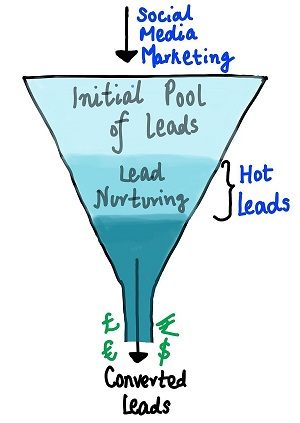

<div style="text-align: justify">
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
</div>
<br/>
<div style="text-align: justify">
X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
</div>

#### Data

<div style="text-align: justify">
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).
</div>

#### Goals of the Case Study

There are quite a few goals for this case study:

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

## Import and Data Loading

### Suppress Warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Imports

In [2]:
# For data loading and operations on dataframe
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

# sklearn
import sklearn                                         # Default
from sklearn.model_selection import train_test_split   # For splitting data
from sklearn.preprocessing import StandardScaler       # For scaling column data
from sklearn.feature_selection import RFE              # For Recursive feature elimination
from sklearn.linear_model import LogisticRegression    # For Logistic model
from sklearn import metrics                            # For matrics operations like Confusion Matrix

# statsmodels
import statsmodels                                                            # Default
import statsmodels.api as sm                                                  # For model building
from statsmodels.stats.outliers_influence import variance_inflation_factor    # For VIF calculation

# scipy
import scipy                                           # Default
from scipy.stats import chi2_contingency               # For Chi-Square Calculation

### Main libraries versions checking

In [3]:
if np.__version__ != "1.24.3":
    print()
    print('"NUMPY VERSION MISMATCH"')
    print("This code is written with Numpy version : 1.23.5.")
    print("This Environment uses Numpy version : " + np.__version__ + ". Few of functionalities maynot work or may work differently.")
    print()

if pd.__version__ != "1.5.3":
    print()
    print('"PANDAS VERSION MISMATCH"')
    print("This code is written with Pandas version : 1.5.3.")
    print("This Environment uses Pandas version : " + pd.__version__ + ". Few of functionalities maynot work or may work differently.")
    print()

if mpl.__version__ != "3.7.1":
    print()
    print('"MATPLOTLIB VERSION MISMATCH"')
    print("This code is written with Matplotlib version : 3.7.0.")
    print("This Environment uses Matplotlib version : " + mpl.__version__ + ". Few of functionalities maynot work or may work differently.")
    print()
    
if sns.__version__ != "0.12.2":
    print()
    print('"SEABORN VERSION MISMATCH"')
    print("This code is written with Seaborn version : 0.12.2.")
    print("This Environment uses Seaborn version is : " + sns.__version__ + ". Few of functionalities maynot work or may work differently.")
    print()
    
if sklearn.__version__ != "1.2.2":
    print()
    print('"SKLEARN VERSION MISMATCH"')
    print("This code is written with sklearn library version : 1.2.2.")
    print("This Environment uses sklearn version is : " + sklearn.__version__ + ". Few of functionalities maynot work or may work differently.")
    print()
    
if statsmodels.__version__ != "0.13.5":
    print()
    print('"STATSMODEL VERSION MISMATCH"')
    print("This code is written with statsmodels library version : 0.13.5.")
    print("This Environment uses statsmodels version is : " + statsmodels.__version__ + ". Few of functionalities maynot work or may work differently.")
    print()
    
if scipy.__version__ != "1.10.1":
    print()
    print('"SCIPY VERSION MISMATCH"')
    print("This code is written with scipy library version : 1.10.1.")
    print("This Environment uses scipy version is : " + scipy.__version__ + ". Few of functionalities maynot work or may work differently.")
    print()

### Adjusting Display
As number of columns are high in datasets, so ajusting maximum number of rows and columns to be displayed to 250 and ALL columns

In [4]:
pd.options.display.max_rows = 250
pd.options.display.max_columns = None

### Loading Data

In [5]:
data = pd.read_csv('Leads.csv')

# Basic Data understanding

In [6]:
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
print(data.shape)

(9240, 37)


#### Decribing Data

In [8]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Checking Unique Values
Checking unique values for each column.

In [10]:
data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: There are following observation based on above information:</b>
    <ul>
        <li>'Converted' is target variable, and has only two unique values 0/1, indicating whether a lead was convered or not.</li>
        <li>Dataset contains two identification columns 'Prospect ID' and 'Lead Number'. As any of one can identify any record uniquely, so dropping 'Prospect ID'.</li>
        <li>ZERO Variance Features:
            <ul>
                <li>'Magazine'</li>
                <li>'Receive More Updates About Our Courses'</li>
                <li>'Update me on Supply Chain Content'</li>
                <li>'Get updates on DM Content'</li>
                <li>'I agree to pay the amount through cheque'</li>
            </ul>
            All above columns have only one unique value, and will not provide any useful insight. Therefore, dropping all mentioned columns</li>
    </ul>
</div>
</div>

### Dropping ZERO Variance Columns
Columns 'Prospect ID', 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content' and 'I agree to pay the amount through cheque'

In [11]:
data.drop(['Prospect ID', 
           'Magazine', 
           'Receive More Updates About Our Courses', 
           'Update me on Supply Chain Content', 
           'Get updates on DM Content', 
           'I agree to pay the amount through cheque'], axis=1, inplace=True)

# <font color='#00008B'>Data Cleaning - Missing Values Handling</font>

### 'Select' as data value
Many of the categorical variables have a level called 'Select'. These 'Select' are usually shown to user in GUI on Wedsites or in-app forms, which tell user to "Select from dropdown list.". However, as all fields are not mandatory, user may skip the field, leaving 'Select' (which is default indicator) as value. From above, its understood that 'Select' is nothing but a missing values and need to be handled.

### 'Select' is being replaced as NaN, and will be handled in each column in similar way, as other missing values are being handled in that particular column.

In [12]:
data.isin(['Select']).sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1942
How did you hear about X Education               5043
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

<div style="background-color: #F9E79F;font-size:14pt">
<b>NOTE: Four Columns 'Specialization', 'How did you hear about X Education', 'Lead Profile', 'City' contains 'Select' value. Need to replace them to null.</b>
</div>

In [13]:
cols = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']
data[cols] = data[cols].replace('Select', np.NaN)

### Missing Values Identification

In [14]:
# Missing values in percentage for data
df_val = data.isnull().mean()*100
df_val[df_val > 0].sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

<div style="background-color: #F9E79F;font-size:14pt">
<b>NOTE: Missing values in Data</b>
</div>

* <b>High missing values (> 40%): </b>
    * How did you hear about X Education
    * Lead Profile
    * Lead Quality
    * Asymmetrique Profile Score
    * Asymmetrique Activity Score
    * Asymmetrique Profile Index
    * Asymmetrique Activity Index
* <b>Medium missing values (10% to 40%): </b>
    * City
    * Specialization
    * Tags
    * What matters most to you in choosing a course
    * What is your current occupation
    * Country
* <b>Low missing values: </b>
    * TotalVisits
    * Page Views Per Visit
    * Last Activity
    * Lead Source

## Handling missing values

### Columns with high missing data

#### <b><font color='blue'>Approach - Drop selective columns with high missing data:</font></b> Dropping columns with high missing value and have less causation.

In [15]:
data.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 
           'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 
           'Asymmetrique Profile Index', 'Asymmetrique Activity Index'], axis=1, inplace=True)

### Columns with Medium missing data

#### <b><font color='blue'>Approach - Analysing missing values for each column before taking any action</font></b>

#### Generic function for categorical data analysis

In [16]:
def cate_data_analysis(inde_var, order='None', display_tables=True):
    trgt_var = 'Converted'
    
    if display_tables == True:
        print(('{}Value Count distribution for "%s"{}' % inde_var).format('\033[1m', '\033[0m'))
        display(data[inde_var].value_counts(dropna = False, normalize = True)*100)

        # To show affect of independent variable to target variable
        print()
        print(('{}Distribution of independent variable "%s" to target variable "Converted"{}' % inde_var).format('\033[1m', '\033[0m'))

        # With Missing Values in percentage
        pvt_tbl = pd.pivot_table(data.fillna('#'), 
                                 index=inde_var, columns=trgt_var, 
                                 values='Lead Number', aggfunc='count', fill_value=0)

        pvt_tbl.columns = ['% for 0', '% for 1']
        pvt_tbl['0'] = pvt_tbl['% for 0']
        pvt_tbl['1'] = pvt_tbl['% for 1']
        pvt_tbl.iloc[:, 0:2] = pvt_tbl.iloc[:, 0:2].apply(lambda x: x.div(x.sum()).mul(100), axis=1)

        if order == 'None':
            display(pvt_tbl)
        else:
            display(pvt_tbl.sort_values(order))
        print()

    # Chi-sq test
    # Without missing values
    pvt_tb = pd.pivot_table(data, 
                            index=inde_var, columns=trgt_var, 
                            values='Lead Number', aggfunc='count', fill_value=0)

    # Performing Chi-sq test
    ChiSqResult = chi2_contingency(pvt_tb)
    print('The P-Value of ChiSq Test:', ChiSqResult[1])

    # If P-Value (Probability) > 0.05 then only we Accept the assumption(Variables are not correlated)
    if ChiSqResult[1] > 0.05:
        print(('{}Independent variable - "%s" is not correlated to target variable - "%s"{}' %(inde_var, trgt_var)).format('\033[1m\033[91m', '\033[00m\033[0m'))
    else:
        print(('{}Independent variable - "%s" is correlated to target variable - "%s"{}' %(inde_var, trgt_var)).format('\033[1m\033[92m', '\033[00m\033[0m'))

### Handling missing values for 'City'

In [17]:
cate_data_analysis('City')

Value Count distribution for "City"


NaN                            39.707792
Mumbai                         34.870130
Thane & Outskirts               8.138528
Other Cities                    7.424242
Other Cities of Maharashtra     4.945887
Other Metro Cities              4.112554
Tier II Cities                  0.800866
Name: City, dtype: float64


Distribution of independent variable "City" to target variable "Converted"


,% for 0,% for 1,0,1
City,,,,
#,65.739984,34.260016,2412,1257
Mumbai,59.373060,40.626940,1913,1309
Other Cities,59.766764,40.233236,410,276
Other Cities of Maharashtra,56.017505,43.982495,256,201
Other Metro Cities,59.210526,40.789474,225,155
Thane & Outskirts,55.053191,44.946809,414,338
Tier II Cities,66.216216,33.783784,49,25



The P-Value of ChiSq Test: 0.1476194325548623
Independent variable - "City" is not correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: 'City' has approximately 40% of missing values, which is way more than highest category ('Mumbai') in this variable. Also, the distribution of various categories over target variable is uniform. A high P-value of Chi-Square test points to that 'City' is not correlated to target variable - 'Converted'.</b>
<br/>
<br/>
<div style="color: red;font-size:14pt">
<b>Therefore, dropping the column 'City'</b>
</div>
</div>

In [18]:
data.drop(['City'], axis=1, inplace=True)

### Handling missing values for 'Specialization'

In [19]:
cate_data_analysis('Specialization')

Value Count distribution for "Specialization"


NaN                                  36.580087
Finance Management                   10.562771
Human Resource Management             9.177489
Marketing Management                  9.069264
Operations Management                 5.443723
Business Administration               4.361472
IT Projects Management                3.961039
Supply Chain Management               3.777056
Banking, Investment And Insurance     3.658009
Travel and Tourism                    2.196970
Media and Advertising                 2.196970
International Business                1.926407
Healthcare Management                 1.720779
Hospitality Management                1.233766
E-COMMERCE                            1.212121
Retail Management                     1.082251
Rural and Agribusiness                0.790043
E-Business                            0.616883
Services Excellence                   0.432900
Name: Specialization, dtype: float64


Distribution of independent variable "Specialization" to target variable "Converted"


,% for 0,% for 1,0,1
Specialization,,,,
#,71.331361,28.668639,2411,969
"Banking, Investment And Insurance",50.591716,49.408284,171,167
Business Administration,55.583127,44.416873,224,179
E-Business,63.157895,36.842105,36,21
E-COMMERCE,64.285714,35.714286,72,40
Finance Management,55.327869,44.672131,540,436
Healthcare Management,50.314465,49.685535,80,79
Hospitality Management,57.894737,42.105263,66,48
Human Resource Management,54.245283,45.754717,460,388



The P-Value of ChiSq Test: 0.00017533061721243615
Independent variable - "Specialization" is correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: 'Specialization' has approximately 37% of missing values, which is way more than highest category in this variable. However, it is observed that there are many categories that are similar or representing same super-category. Also, A low P-value of Chi-Square test points to that 'Specialization' is correlated to target variable - 'Converted'.</b>
<br/>
<br/>
<div style="color: green;font-size:14pt">
<b>Therefore, following actions are being taken:</b>
    <ul>
        <li>Clubbing similar categories in column 'Specialization'</li>
        <li>Creating new category of 'Unknown' for missing values: As merging of missing values with any of existing category may result in loss of information for particular category, therefore creating new category of 'Unknown' for missing values.
    </ul>
</div>
</div>

#### Finding clubbed catehories

In [20]:
print('{}Specializations related to Management:{}'.format('\033[1m', '\033[0m'))
print(data.loc[data["Specialization"].str.lower().str.contains('management', na=False), 'Specialization'].unique())
print()
print('{}Specializations related to Business:{}'.format('\033[1m', '\033[0m'))
print(data.loc[data["Specialization"].str.lower().str.contains('business', na=False), 'Specialization'].unique())
print()
print('{}Specializations related to Others (not releated to Management and Business):{}'.format('\033[1m', '\033[0m'))
print(data.loc[(data["Specialization"].isnull() == False) & 
               (data["Specialization"].str.lower().str.contains('management', na=False) == False) & 
               (data["Specialization"].str.lower().str.contains('business', na=False) == False), 'Specialization'].unique())

Specializations related to Management:
['Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Human Resource Management' 'Marketing Management'
 'Operations Management' 'Retail Management' 'Hospitality Management'
 'Healthcare Management']

Specializations related to Business:
['Business Administration' 'International Business'
 'Rural and Agribusiness' 'E-Business']

Specializations related to Others (not releated to Management and Business):
['Media and Advertising' 'Travel and Tourism'
 'Banking, Investment And Insurance' 'E-COMMERCE' 'Services Excellence']


#### Clubbing similar categories in column 'Specialization'

In [21]:
data.loc[data["Specialization"].str.lower().str.contains('management', na=False), 'Specialization'] = 'Management'
data.loc[data["Specialization"].str.lower().str.contains('business', na=False), 'Specialization'] = 'Business'
data.loc[(data["Specialization"].isnull() == False) & 
               (data["Specialization"].str.lower().str.contains('management', na=False) == False) & 
               (data["Specialization"].str.lower().str.contains('business', na=False) == False), 'Specialization'] = 'Others'

#### Creating new category of 'Unknown' for missing values

In [22]:
data['Specialization'] = data['Specialization'].fillna('Unknown')

In [23]:
data['Specialization'].value_counts(dropna = False, normalize = True)*100

Management    46.028139
Unknown       36.580087
Others         9.696970
Business       7.694805
Name: Specialization, dtype: float64

### Handling missing values for 'Tags'

In [24]:
cate_data_analysis('Tags', order='% for 1')

Value Count distribution for "Tags"


NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0


Distribution of independent variable "Tags" to target variable "Converted"


,% for 0,% for 1,0,1
Tags,,,,
wrong number given,100.000000,0.000000,47,0
number not provided,100.000000,0.000000,27,0
University not recognized,100.000000,0.000000,2,0
Recognition issue (DEC approval),100.000000,0.000000,1,0
Lost to Others,100.000000,0.000000,7,0
Already a student,99.354839,0.645161,462,3
Not doing further education,99.310345,0.689655,144,1
invalid number,98.795181,1.204819,82,1
Diploma holder (Not Eligible),98.412698,1.587302,62,1



The P-Value of ChiSq Test: 0.0
Independent variable - "Tags" is correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: 'Tags' has approximately 36% of missing values, which is way more than highest category in this variable. However, if distribution of various categories over target variable is observed, it shows that the various categories including 'missing vales' shows very good correlation with target variable.</b>
<br/>
<br/>
<div style="color: green;font-size:14pt">
<b>Various new categories based on tags:</b>
    <ul>
        <li><b>LOW_CONVERSION_CHANCES (Categories where there are high chances of lead to be converted):</b>
            <ul>
                <li>wrong number given</li>
                <li>number not provided</li>
                <li>University not recognized</li>
                <li>Recognition issue (DEC approval)</li>
                <li>Lost to Others</li>
                <li>Already a student</li>
                <li>Not doing further education</li>
                <li>invalid number</li>
                <li>Diploma holder (Not Eligible)</li>
                <li>switched off</li>
                <li>Interested in other courses</li>
                <li>Interested in full time MBA</li>
                <li>Ringing</li>
                <li>Graduation in progress</li>
                <li>opp hangup</li>
                <li>Still Thinking</li>
                <li>In confusion whether part time or DLP</li>
                <li>#MISSING_VALUES#</li>
                <li>in touch with EINS</li>
            </ul>
        </li>
        <li><b>MODERATE_CONVERSION_CHANCES (Categories where there are high chances of lead to be converted):</b>
            <ul>
                <li>Want to take admission but has financial problems</li>
                <li>Shall take in the next coming month</li>
                <li>Busy</li>
            </ul>
        </li>
        <li><b>HIGH_CONVERSION_CHANCES (Categories where there are high chances of lead to be converted):</b>
            <ul>
                <li>Will revert after reading the email</li>
                <li>Lost to EINS</li>
                <li>Closed by Horizzon</li>
                <li>Lateral student</li>
                <li>Interested in Next batch</li>
            </ul>
        </li>
    </ul>
<b>Therefore, following actions are being taken:</b>
    <ul>
        <li>New column is created named 'Tags_Conversion_Chances', where clubbing similar categories based on their influence on lead to be convered.</li>
        <li>All missing values are merged with 'LOW_CONVERSION_CHANCES'</li>.
    </ul>
</div>
</div>

#### Creation of new column 'Tags_Conversion_Chances' based on 'Tags'

In [25]:
map_tags = {
    'wrong number given': 'LOW_CONVERSION_CHANCES', 'number not provided': 'LOW_CONVERSION_CHANCES', 
    'University not recognized': 'LOW_CONVERSION_CHANCES', 'Recognition issue (DEC approval)': 'LOW_CONVERSION_CHANCES', 
    'Lost to Others': 'LOW_CONVERSION_CHANCES', 'Already a student': 'LOW_CONVERSION_CHANCES', 
    'Not doing further education': 'LOW_CONVERSION_CHANCES', 'invalid number': 'LOW_CONVERSION_CHANCES', 
    'Diploma holder (Not Eligible)': 'LOW_CONVERSION_CHANCES', 'switched off': 'LOW_CONVERSION_CHANCES', 
    'Interested in other courses': 'LOW_CONVERSION_CHANCES', 'Interested in full time MBA': 'LOW_CONVERSION_CHANCES', 
    'Ringing': 'LOW_CONVERSION_CHANCES', 'Graduation in progress': 'LOW_CONVERSION_CHANCES', 
    'opp hangup': 'LOW_CONVERSION_CHANCES', 'Still Thinking': 'LOW_CONVERSION_CHANCES', 
    'In confusion whether part time or DLP': 'LOW_CONVERSION_CHANCES', 'in touch with EINS': 'LOW_CONVERSION_CHANCES', 

    'Want to take admission but has financial problems': 'MODERATE_CONVERSION_CHANCES', 
    'Shall take in the next coming month': 'MODERATE_CONVERSION_CHANCES', 
    'Busy': 'MODERATE_CONVERSION_CHANCES', 

    'Will revert after reading the email': 'HIGH_CONVERSION_CHANCES', 
    'Lost to EINS': 'HIGH_CONVERSION_CHANCES', 
    'Closed by Horizzon': 'HIGH_CONVERSION_CHANCES', 
    'Lateral student': 'HIGH_CONVERSION_CHANCES', 
    'Interested in Next batch': 'HIGH_CONVERSION_CHANCES'
}
data['Tags_Conversion_Chances'] = data['Tags'].map(map_tags)

#### All missing values are merged with 'LOW_CONVERSION_CHANCES'

In [26]:
data['Tags_Conversion_Chances'] = data['Tags_Conversion_Chances'].fillna('LOW_CONVERSION_CHANCES')
data.drop(['Tags'], axis=1, inplace=True)

In [27]:
data['Tags_Conversion_Chances'].value_counts(dropna = False, normalize = True)*100

LOW_CONVERSION_CHANCES         69.621212
HIGH_CONVERSION_CHANCES        28.279221
MODERATE_CONVERSION_CHANCES     2.099567
Name: Tags_Conversion_Chances, dtype: float64

### Handling missing values for 'What matters most to you in choosing a course'

In [28]:
cate_data_analysis('What matters most to you in choosing a course')

Value Count distribution for "What matters most to you in choosing a course"


Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64


Distribution of independent variable "What matters most to you in choosing a course" to target variable "Converted"


,% for 0,% for 1,0,1
What matters most to you in choosing a course,,,,
#,86.341824,13.658176,2339,370
Better Career Prospects,51.133578,48.866422,3338,3190
Flexibility & Convenience,50.000000,50.000000,1,1
Other,100.000000,0.000000,1,0



The P-Value of ChiSq Test: 0.6198474529719338
Independent variable - "What matters most to you in choosing a course" is not correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Out of 9240 records, there are only 9237 records where value for 'What matters most to you in choosing a course' is either 'Better Career Prospects' or missing value. Column doesn't contain meaningful insight.</b>
<br/>
<br/>
<div style="color: red;font-size:14pt">
<b>Therefore, dropping the column 'What matters most to you in choosing a course'</b>
</div>
</div>

In [29]:
data.drop(['What matters most to you in choosing a course'], axis=1, inplace=True)

### Handling missing values for 'What is your current occupation'

In [30]:
cate_data_analysis('What is your current occupation')

Value Count distribution for "What is your current occupation"


Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64


Distribution of independent variable "What is your current occupation" to target variable "Converted"


,% for 0,% for 1,0,1
What is your current occupation,,,,
#,86.245353,13.754647,2320,370
Businessman,37.500000,62.500000,3,5
Housewife,0.000000,100.000000,0,10
Other,37.500000,62.500000,6,10
Student,62.857143,37.142857,132,78
Unemployed,56.410714,43.589286,3159,2441
Working Professional,8.356941,91.643059,59,647



The P-Value of ChiSq Test: 4.0070810643261665e-128
Independent variable - "What is your current occupation" is correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: 'What is your current occupation' has approximately 29% of missing values, which is second highest category in this variable. However, A very low P-value (close to zero) of Chi-Square test points to that 'What is your current occupation' is correlated to target variable - 'Converted'.</b>
<br/>
<br/>
<div style="color: green;font-size:14pt">
<b>Therefore, following actions are being taken:</b>
    <ul>
        <li>Clubbing similar categories with low occurances to 'Other' in column 'What is your current occupation'</li>
        <li>Evenly asigning different categories to missing values, so that statistics don't get affected. Adding all values to single category may create biasness and may affect result.</li>
    </ul>
</div>
</div>

#### Clubbing similar categories with low occurances to 'Other'

In [31]:
data['What is your current occupation'] = data['What is your current occupation'].apply(
                lambda x: 'Other' if (x == 'Housewife' or x == 'Businessman') else x)

In [32]:
data['What is your current occupation'].value_counts(normalize = True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.005191
Name: What is your current occupation, dtype: float64

#### Evenly asigning different categories to missing values

In [33]:
data['What is your current occupation'] = data['What is your current occupation'].fillna(
                                        pd.Series(np.random.choice(['Unemployed', 'Working Professional', 'Student', 'Other'], 
                                        p = [0.854962, 0.107786, 0.032061, 0.005191], size = len(data))))

In [34]:
data['What is your current occupation'].value_counts(dropna = False, normalize = True)*100

Unemployed              86.190476
Working Professional    10.227273
Student                  3.041126
Other                    0.541126
Name: What is your current occupation, dtype: float64

### Handling missing values for 'Country'

In [35]:
cate_data_analysis('Country')

Value Count distribution for "Country"


India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         


Distribution of independent variable "Country" to target variable "Converted"


,% for 0,% for 1,0,1
Country,,,,
#,56.277936,43.722064,1385,1076
Asia/Pacific Region,50.000000,50.000000,1,1
Australia,76.923077,23.076923,10,3
Bahrain,42.857143,57.142857,3,4
Bangladesh,50.000000,50.000000,1,1
Belgium,100.000000,0.000000,2,0
Canada,100.000000,0.000000,4,0
China,100.000000,0.000000,2,0
Denmark,0.000000,100.000000,0,1



The P-Value of ChiSq Test: 0.4552761871725188
Independent variable - "Country" is not correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Out of 9240 records, there are only 8953 records (appox. 96%) where value for 'Country' is either 'India' or missing value. Column doesn't contain meaningful insight.</b>
<br/>
<br/>
<div style="color: red;font-size:14pt">
<b>Therefore, dropping the column 'What matters most to you in choosing a course'</b>
</div>
</div>

In [36]:
data.drop(['Country'], axis=1, inplace=True)

### Columns with Low missing data

In [37]:
# Missing values in percentage for data
df_val = data.isnull().mean()*100
df_val[df_val > 0].sort_values(ascending=False)

TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
Lead Source             0.389610
dtype: float64

#### <b><font color='blue'>Approach - Analysing missing values for each column before taking any action</font></b>

### Handling missing values for 'TotalVisits'

In [38]:
data['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Imputing missing values in 'TotalVisits'

Mean and median are close enough, and are same when rounded. Replacing missing values with median.

In [39]:
data['TotalVisits'] = data['TotalVisits'].fillna(data['TotalVisits'].median())

### Handling missing values for 'Page Views Per Visit'

In [40]:
data['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Imputing missing values in 'Page Views Per Visit'

Mean and median are close enough, and are same when rounded. Replacing missing values with median.

In [41]:
data['Page Views Per Visit'] = data['Page Views Per Visit'].fillna(data['Page Views Per Visit'].median())

### Handling missing values for 'Last Activity'

In [42]:
cate_data_analysis('Last Activity')

Value Count distribution for "Last Activity"


Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64


Distribution of independent variable "Last Activity" to target variable "Converted"


,% for 0,% for 1,0,1
Last Activity,,,,
#,21.359223,78.640777,22,81
Approached upfront,0.000000,100.000000,0,9
Converted to Lead,87.383178,12.616822,374,54
Email Bounced,92.024540,7.975460,300,26
Email Link Clicked,72.659176,27.340824,194,73
Email Marked Spam,0.000000,100.000000,0,2
Email Opened,63.543788,36.456212,2184,1253
Email Received,0.000000,100.000000,0,2
Form Submitted on Website,75.862069,24.137931,88,28



The P-Value of ChiSq Test: 1.269441954093108e-298
Independent variable - "Last Activity" is correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: 'Last Activity' has approximately 1% of missing values, and very low P-value (close to zero) of Chi-Square test points to that 'Last Activity' is correlated to target variable - 'Converted'. However, There exists a column 'Last Notable Activity' in dataset that is looks more relevent, as last activity (action) may be exactly opposite to lead's sentiments. For instance, positive sentiments like 'Olark Chat Conversation', 'View in browser link Clicked', 'Converted to Lead' looks opposite outcome.</b>
<br/>
<br/>
<div style="color: red;font-size:14pt">
<b>Therefore, following actions are being taken:</b>
    <ul>
        <li>Dropping column 'Last Activity', keeping 'Last Notable Activity' for further analysis.</li>
    </ul>
</div>
</div>

In [43]:
data.drop(['Last Activity'], axis=1, inplace=True)

### Handling missing values for 'Lead Source'

In [44]:
cate_data_analysis('Lead Source')

Value Count distribution for "Lead Source"


Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64


Distribution of independent variable "Lead Source" to target variable "Converted"


,% for 0,% for 1,0,1
Lead Source,,,,
#,19.444444,80.555556,7,29
Click2call,25.000000,75.000000,1,3
Direct Traffic,67.833268,32.166732,1725,818
Facebook,76.363636,23.636364,42,13
Google,60.006974,39.993026,1721,1147
Live Chat,0.000000,100.000000,0,2
NC_EDM,0.000000,100.000000,0,1
Olark Chat,74.472934,25.527066,1307,448
Organic Search,62.218371,37.781629,718,436



The P-Value of ChiSq Test: 4.0834502966012515e-212
Independent variable - "Lead Source" is correlated to target variable - "Converted"


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: 'Lead Source' has less than 0.5% of missing values, and very low P-value (close to zero) of Chi-Square test points to that 'Lead Source' is correlated to target variable - 'Converted'. Another, thing to note that 'Lead Source' has category 'google' that should be clubbed with 'Google', as both represent the same category.</b>
<br/>
<br/>
<div style="color: green;font-size:14pt">
<b>Therefore, following actions are being taken:</b>
    <ul>
        <li>Replace value 'google' with 'Google'.</li>
        <li>Imputing missing values with mode value for column.</li>
    </ul>
</div>
</div>

#### Replace value 'google' with 'Google'

In [45]:
data['Lead Source'] = data['Lead Source'].apply(lambda x: 'Google' if x == 'google' else x)

#### Imputing missing values with mode value for column

In [46]:
data['Lead Source'] = data['Lead Source'].fillna(data['Lead Source'].mode()[0])

### Verifying again any missing value in dataset

In [47]:
# Missing values in percentage for data
data.isnull().mean()*100

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
Tags_Conversion_Chances                   0.0
dtype: float64

# <font color='#00008B'>Data Cleaning - Understanding and Manipulation</font>

In [48]:
data.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Tags_Conversion_Chances
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Unknown,Unemployed,No,No,No,No,No,No,No,Modified,LOW_CONVERSION_CHANCES
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Unknown,Unemployed,No,No,No,No,No,No,No,Email Opened,LOW_CONVERSION_CHANCES
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Business,Student,No,No,No,No,No,No,Yes,Email Opened,HIGH_CONVERSION_CHANCES
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Others,Unemployed,No,No,No,No,No,No,No,Modified,LOW_CONVERSION_CHANCES
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Unknown,Unemployed,No,No,No,No,No,No,No,Modified,HIGH_CONVERSION_CHANCES


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Do Not Call                             9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

In [50]:
data[['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
      'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']].nunique()

Do Not Email                              2
Do Not Call                               2
Search                                    2
Newspaper Article                         2
X Education Forums                        2
Newspaper                                 2
Digital Advertisement                     2
Through Recommendations                   2
A free copy of Mastering The Interview    2
dtype: int64

In [51]:
col_cate_yes_no = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
              'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

for col in col_cate_yes_no:
    print('Unique values for column "%s"' % col, ':', data[col].unique())

Unique values for column "Do Not Email" : ['No' 'Yes']
Unique values for column "Do Not Call" : ['No' 'Yes']
Unique values for column "Search" : ['No' 'Yes']
Unique values for column "Newspaper Article" : ['No' 'Yes']
Unique values for column "X Education Forums" : ['No' 'Yes']
Unique values for column "Newspaper" : ['No' 'Yes']
Unique values for column "Digital Advertisement" : ['No' 'Yes']
Unique values for column "Through Recommendations" : ['No' 'Yes']
Unique values for column "A free copy of Mastering The Interview" : ['No' 'Yes']


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Columns 'Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', and 'A free copy of Mastering The Interview' have 2 options Yes/No.</b>
<br/>
<br/>
<div style="color: green;font-size:14pt">
<b>Therefore, following actions are being taken for above mentioned columns:</b>
    <ul>
        <li>Replace Yes/No with 1/0.</li>
        <li>Converting data to int type.</li>
    </ul>
</div>
</div>

#### Replacing Yes/No with 1/0 (pandas automatically convert datatype to int64)

In [52]:
data[col_cate_yes_no] = data[col_cate_yes_no].applymap(lambda x: 1 if x == 'Yes' else 0)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Do Not Email                            9240 non-null   int64  
 4   Do Not Call                             9240 non-null   int64  
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9240 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9240 non-null   float64
 9   Specialization                          9240 non-null   object 
 10  What is your current occupation         9240 non-null   obje

# <font color='#00008B'>Exploratory Data Analysis (EDA)</font>

## <font color='#00008B'>Data Categorisation for Analysis</font>

#### Categorical Flags (Yes/No) Columns List for Analysis

In [54]:
col_cate_yes_no = ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
                   'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview']

#### Categorical Columns List for Analysis

In [55]:
col_cate = ['Lead Origin', 'Lead Source', 'Specialization', 'What is your current occupation', 
            'Last Notable Activity', 'Tags_Conversion_Chances']

#### Countinous/Numerical Columns List for Analysis

In [56]:
col_numr = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

## <font color='#00008B'>Custom Functions Definition</font>

Custom Functions will help in creating desired and multiple views/charts through loops.

#### For adding Header

In [57]:
# To add header on set of plots
def drawHeader(fig, axp, flagd, dlabl):
    linec = '#E3120B'
    if flagd == 1: # Vertical for one and no horizontal
        axp.plot([1.15, 1.15], [0.2, 0.8], color=linec, lw=1, transform=axp.transAxes, clip_on=False)
        axp.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color=linec, linewidth=.6)
        axp.add_patch(plt.Polygon([[0.12,.98], [0.16,.98], [0.14,.96]], transform=fig.transFigure, clip_on=False, color=linec))
        axp.text(x=0.17, y=.94, s=dlabl, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    elif flagd == 2: # Vertical for two and horizontal
        axp.plot([0.3, 2], [-0.2, -0.2], color=linec, lw=1, transform=axp.transAxes, clip_on=False)
        axp.plot([1.15, 1.15], [-1.3, 0.8], color=linec, lw=1, transform=axp.transAxes, clip_on=False)
        axp.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color=linec, linewidth=.6)
        axp.add_patch(plt.Polygon([[0.12,.98], [0.16,.98], [0.14,.96]], transform=fig.transFigure, clip_on=False, color=linec))
        axp.text(x=0.17, y=.94, s=dlabl, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    elif flagd == 3: # Vertical for upper and horizontal
        axp.plot([0.3, 2], [-0.28, -0.28], color=linec, lw=1, transform=axp.transAxes, clip_on=False)
        axp.plot([1.15, 1.15], [0.2, 0.8], color=linec, lw=1, transform=axp.transAxes, clip_on=False)
        axp.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color=linec, linewidth=.6)
        axp.add_patch(plt.Polygon([[0.12,.98], [0.16,.98], [0.14,.96]], transform=fig.transFigure, clip_on=False, color=linec))
        axp.text(x=0.17, y=.94, s=dlabl, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)
    elif flagd == 4: # Vertical for two and no horizontal
        axp.plot([1.15, 1.15], [-1.3, 0.8], color=linec, lw=1, transform=axp.transAxes, clip_on=False)
        axp.plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color=linec, linewidth=.6)
        axp.add_patch(plt.Polygon([[0.12,.98], [0.16,.98], [0.14,.96]], transform=fig.transFigure, clip_on=False, color=linec))
        axp.text(x=0.17, y=.94, s=dlabl, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)


### For Univariant Categorical Variable

In [58]:
def visualize_cate_data(df_alldata, var_x, var_y, dlabl):
    linec = '#E3120B'
    cmapc = ["#ccdefb", "#3196f3"]
    
    datas = data[var_x].value_counts()
    datas_Norm = data[var_x].value_counts(normalize = True)*100
    
    fig, ax = plt.subplots(1, 2, figsize=(13.33, 6.5), dpi = 96)
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=0.4, hspace=0.4)


    ax[0].plot([1.15, 1.15], [0.2, 0.8], color=linec, lw=1, transform=ax[0].transAxes, clip_on=False)
    ax[0].plot([0.12, .9], [.98, .98], transform=fig.transFigure, clip_on=False, color=linec, linewidth=.6)
    ax[0].add_patch(plt.Polygon([[0.12,.98], [0.16,.98], [0.14,.96]], transform=fig.transFigure, clip_on=False, color=linec))
    ax[0].text(x=0.17, y=.94, s=dlabl, transform=fig.transFigure, ha='left', fontsize=14, weight='bold', alpha=.8)

    pivot_1 = pd.pivot_table(df_alldata, index=var_x, columns=var_y, values='Lead Number', aggfunc='count')

    if len(datas_Norm) <= 2:
        # Pie
        ax[0].pie(datas_Norm, labels=datas_Norm.index, autopct='%.2f%%')

        axp1 = ax[1]
        axp1.set_title('"' + var_x + '" wise Conversion of Leads')
        pivot_1.plot.bar(ax=axp1)
    else:
        # Colourmap initializing and normalizing (between 0 to 1) [Dual tone - lighter (min) to darker (max)]
        cmap = mpl.colors.LinearSegmentedColormap.from_list("colour_map", cmapc, N=256)
        norm = mpl.colors.Normalize(datas.min(), datas.max())

        # Plot bars
        bar1 = ax[0].bar(datas_Norm.index, datas_Norm, color=cmap(norm(datas)), width=0.4, zorder=2)

        # Create the grid 
        ax[0].grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
        ax[0].grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

        # Label and ticks
        ax[0].set_ylabel(var_y, fontsize=12, labelpad=10)
        ax[0].set_xlabel(var_x, fontsize=12, labelpad=10)
        ax[0].set_xticks(datas.index, datas.index, rotation=90)

        # Add label on top of each bar
        ax[0].bar_label(bar1, labels=[f'{e:,.0f}' for e in datas], padding=3, color='black', fontsize=8) 

        # Remove the spines
        ax[0].spines[['top']].set_visible(False)
    
        axp2 = ax[1]
        axp2.set_title('"' + var_x + '" wise Conversion of Leads (in %)')
        pivot_1.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, legend=False, ax=axp2)
    
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_ylabel(var_y, fontsize=12, labelpad=10)
    ax[1].set_xlabel(var_x, fontsize=12, labelpad=10)
    plt.show()

### For Univariant Numerical

Distribution Plot

In [59]:
# Distribution plot for Numerical variables
def drawNumrDist(fig, axp, flagd, trgtt, datas, dlabl):
    axp.set_title(trgtt)
    sns.distplot(datas, ax=axp)

    # Create the grid 
    axp.grid(which="major", axis='x', color='#DAD8D7', alpha=0.5, zorder=1)
    axp.grid(which="major", axis='y', color='#DAD8D7', alpha=0.5, zorder=1)

    if dlabl.startswith("EXT_SOURCE"):
        xlabels = ['{:.2f}'.format(x) for x in axp.get_xticks()]
    else:
        xlabels = ['{:.0f}'.format(x) for x in axp.get_xticks()]
    axp.set_xticklabels(xlabels, rotation=90)
    drawHeader(fig, axp, flagd, dlabl)

Box Plot

In [60]:
# Box plot for Numerical variables
def drawNumrBoxp(fig, axp, flagd, data0, data1, dlabl):
    bp1 = axp.boxplot(data0, vert=False, positions=[0], widths=0.45, 
                 patch_artist=True, boxprops=dict(facecolor="C0"))
    bp2 = axp.boxplot(data1, vert=False, positions=[1], widths=0.45, 
                     patch_artist=True, boxprops=dict(facecolor="C2"))
    
    if dlabl.startswith("EXT_SOURCE"):
        xlabels = ['{:.2f}'.format(x) for x in axp.get_xticks()]
    else:
        xlabels = ['{:.0f}'.format(x) for x in axp.get_xticks()]
    axp.set_xticklabels(xlabels, rotation=90)

    axp.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Converted = 0', 'Converted = 1'], loc='upper right')
    axp.set_ylim(-1,2)
    drawHeader(fig, axp, flagd, dlabl)

Calling Function for Numerical Variables

In [61]:
def visualize_numr_data(df_alldata, var_x, var_y, dlabl):
    linec = '#E3120B'
    cmapc = ["#ccdefb", "#3196f3"]
    
    data0 = df_alldata[var_x]
    data1 = df_alldata[var_x]
    
    fig, ax = plt.subplots(1, 2, figsize=(13.33, 6.5), dpi = 96)
    plt.subplots_adjust(left=None, bottom=0.2, right=None, top=0.9, wspace=0.4, hspace=0.4)

    
    axp1 = ax[0]
    drawNumrDist(fig, axp1, 1, "", data0, dlabl)

    axp3 = ax[1]
    drawNumrBoxp(fig, axp3, 0, data0, data1, dlabl)

    
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
    ax[1].set_ylabel(var_y, fontsize=12, labelpad=10)
    ax[1].set_xlabel(var_x, fontsize=12, labelpad=10)
    plt.show()

### For Bivariant Analysis (Categorical v/s categorical)

In [62]:
# This is main function that will generate Bar Plot and Stack Plot
# for Bivariant Categorical vs Categorical.
def visualize_bivarient_data(df, dlabl1, dlabl2, TARGET, key):
    fig = plt.figure(figsize=(13.33, 6), dpi = 96)
    gs = fig.add_gridspec(1,2)

    plt.subplots_adjust(left=None, bottom=0.0, right=None, top=0.90, wspace=0.4, hspace=0.4)

    pivot_1 = pd.pivot_table(df, index=dlabl1, columns=dlabl2, values=key, aggfunc='count')
    pivot_2 = pd.pivot_table(df, index=dlabl1, columns=dlabl2, values=key, aggfunc='count')
    
    axp1 = fig.add_subplot(gs[0, 0])
    axp1.set_title("Density Distribution")
    pivot_1.plot.bar(ax=axp1)
    drawHeader(fig, axp1, 1, dlabl1 + " v/s " + dlabl2)
    
    axp2 = fig.add_subplot(gs[0, 1])
    axp2.set_title("Relation in %age")
    pivot_1.apply(lambda x: x/x.sum(), axis=1).plot(kind='bar', stacked=True, legend=False, ax=axp2)
    
    plt.show()

## <font color='#00008B'>Data Analysis - Univariant</font>

## Categorical Flags (Yes/No) Variables

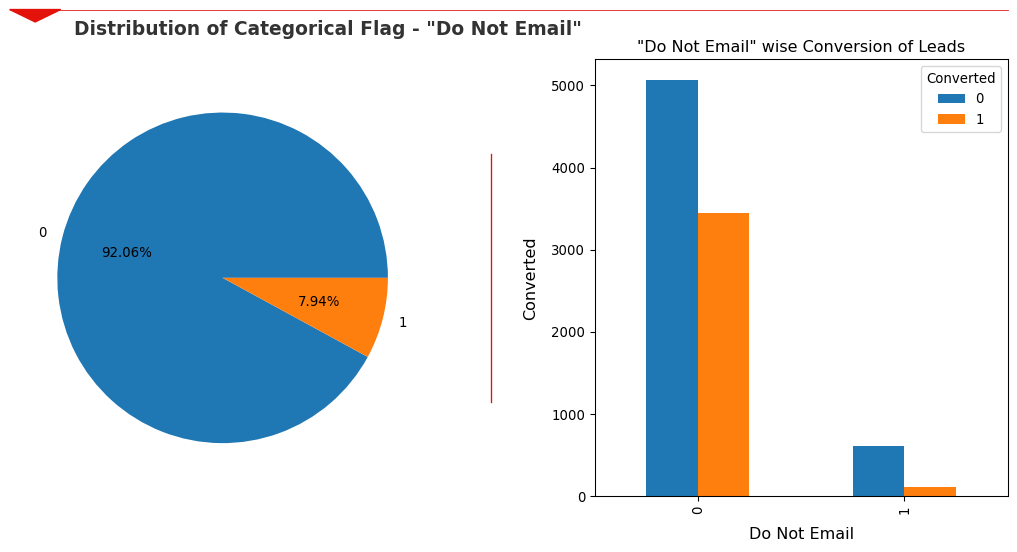

The P-Value of ChiSq Test: 1.3384599721779416e-38
Independent variable - "Do Not Email" is correlated to target variable - "Converted"



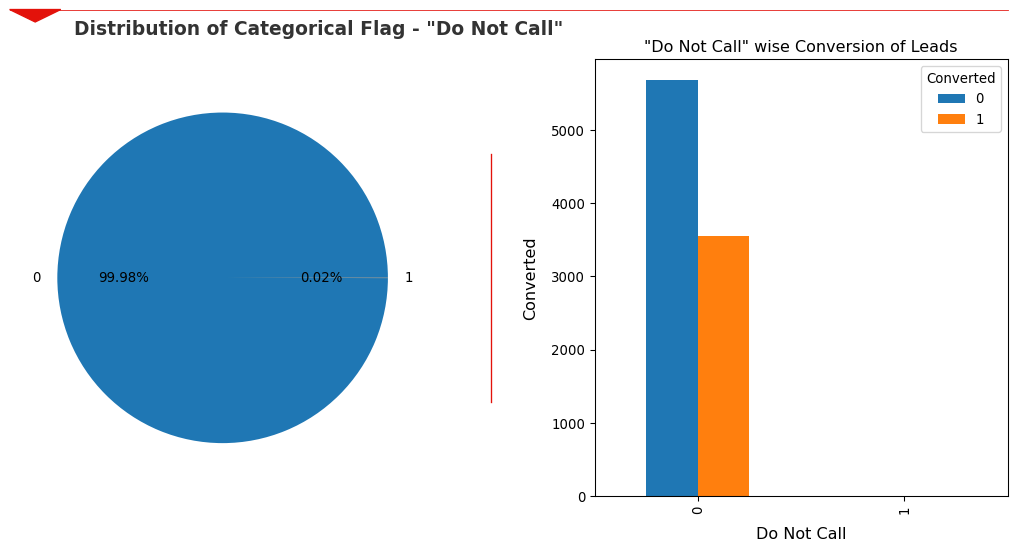

The P-Value of ChiSq Test: 0.2893275634129693
Independent variable - "Do Not Call" is not correlated to target variable - "Converted"



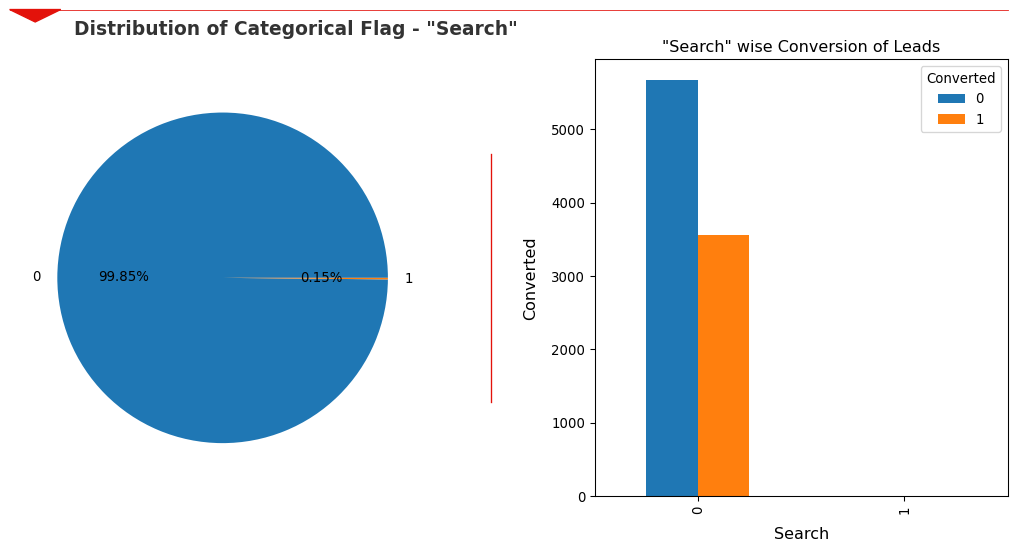

The P-Value of ChiSq Test: 1.0
Independent variable - "Search" is not correlated to target variable - "Converted"



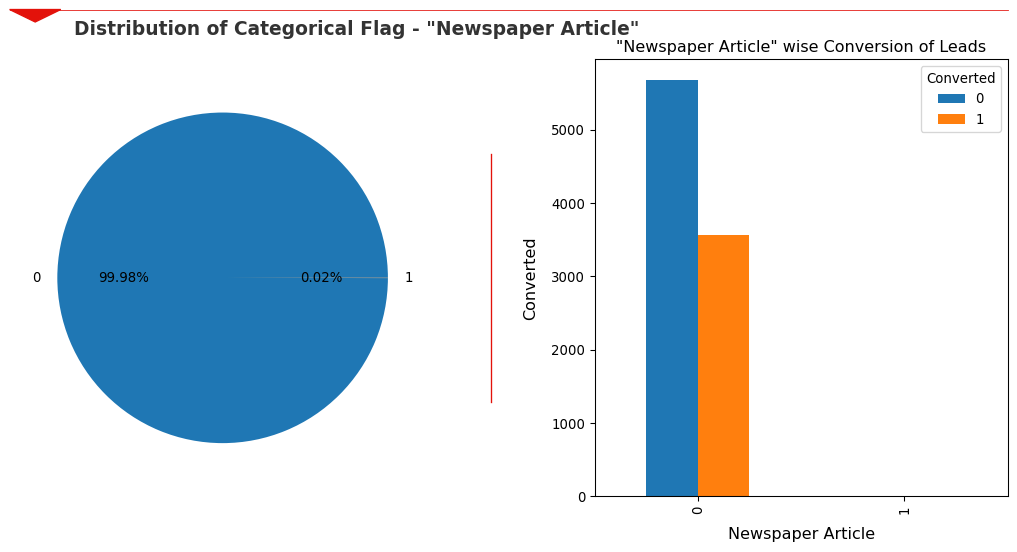

The P-Value of ChiSq Test: 1.0
Independent variable - "Newspaper Article" is not correlated to target variable - "Converted"



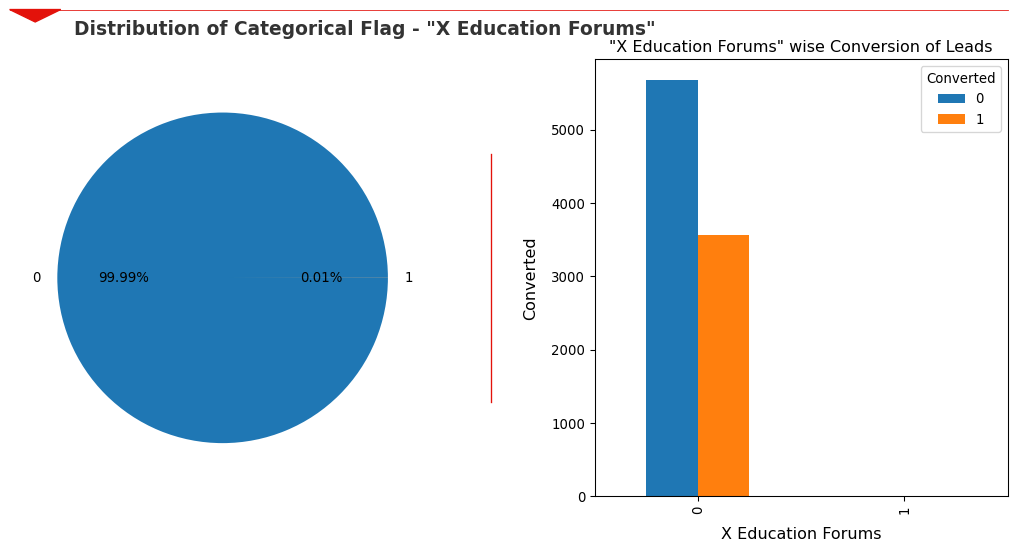

The P-Value of ChiSq Test: 1.0
Independent variable - "X Education Forums" is not correlated to target variable - "Converted"



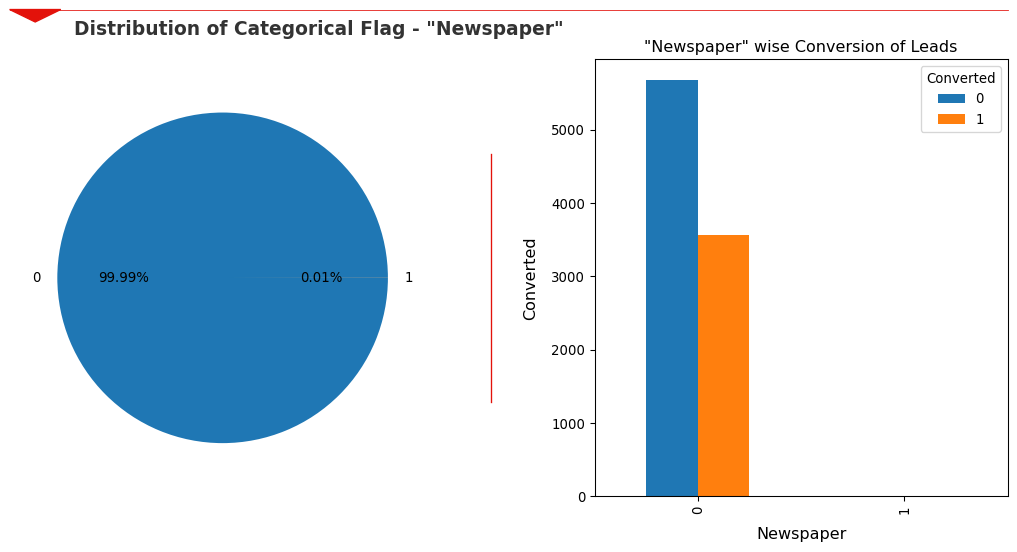

The P-Value of ChiSq Test: 1.0
Independent variable - "Newspaper" is not correlated to target variable - "Converted"



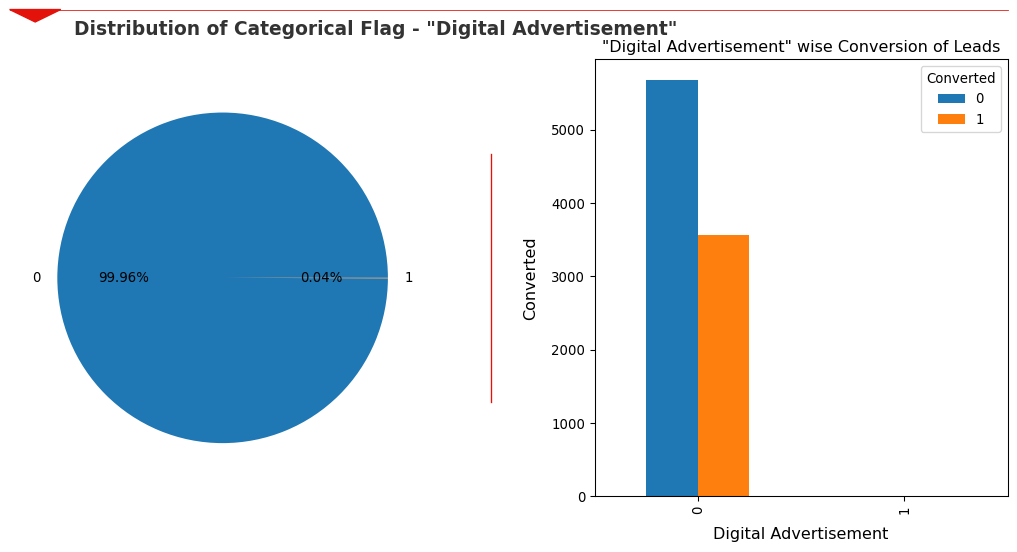

The P-Value of ChiSq Test: 0.9659371166887805
Independent variable - "Digital Advertisement" is not correlated to target variable - "Converted"



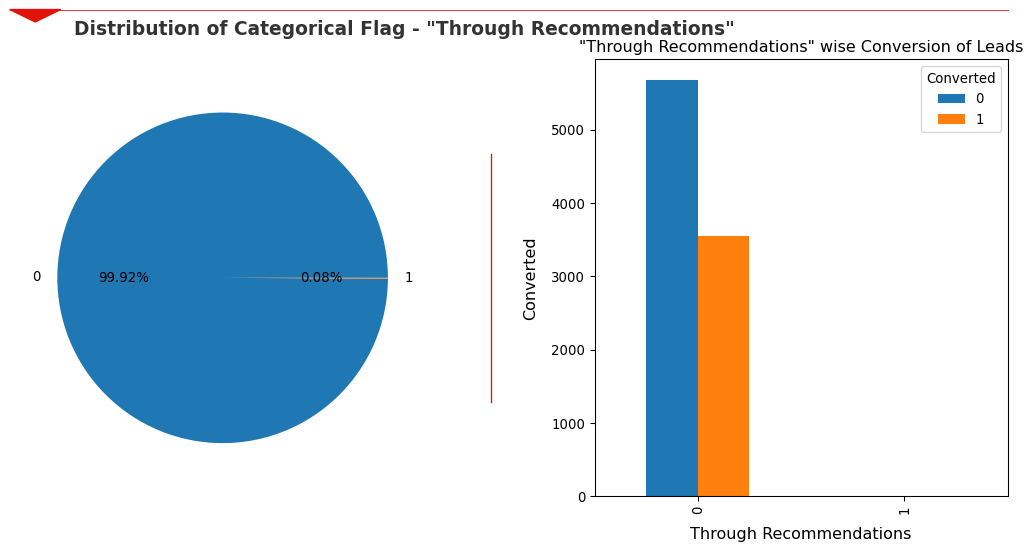

The P-Value of ChiSq Test: 0.16145726251934528
Independent variable - "Through Recommendations" is not correlated to target variable - "Converted"



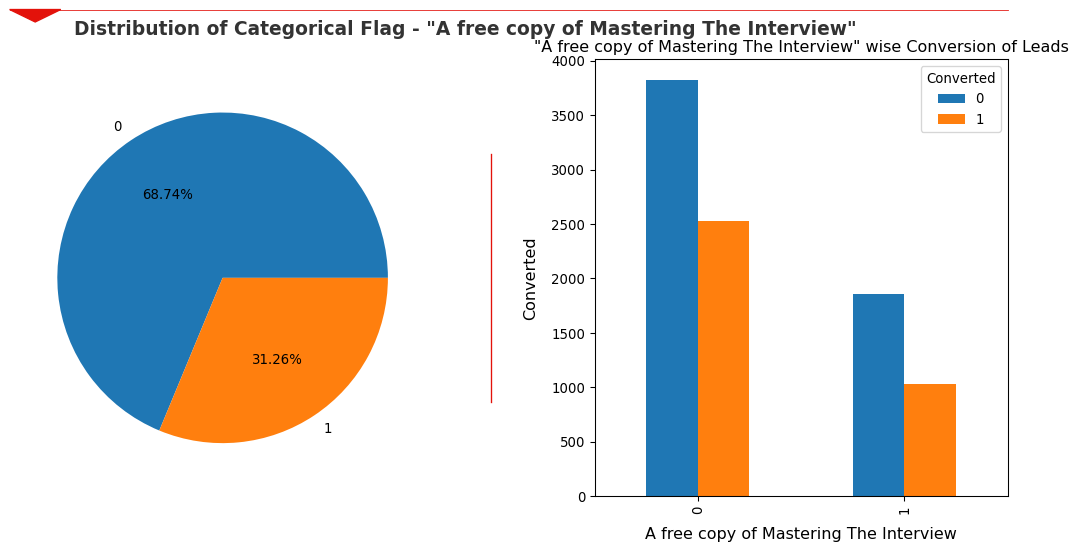

The P-Value of ChiSq Test: 0.00014201097210552065
Independent variable - "A free copy of Mastering The Interview" is correlated to target variable - "Converted"



In [63]:
for col in col_cate_yes_no:
    visualize_cate_data(data, col, 'Converted', 'Distribution of Categorical Flag - "' + col + '"')
    cate_data_analysis(col, display_tables=False)
    print()

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Data Visualisation of Categorical Flags (Yes/No) Variables, has indicated following insights:</b>
    <ul>
        <li><b>For 'Do Not Email':</b> Yes/No values in data of column is 8% and 92% respectively. Also, low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
        <li><b>For 'Do Not Call':</b> Values in column is highly skewed with 99.98% values as 'No'. Also, high P-value of Chi-Square test also indicates its a poor indicator for target variable (Converted). The column may not produce unseful insignts for the study and should be dropped.</li>
        <li><b>For 'Search':</b> Values in column is highly skewed with 99.85% values as 'No'. Also, high P-value of Chi-Square test also indicates its a poor indicator for target variable (Converted). The column may not produce unseful insignts for the study and should be dropped.</li>
        <li><b>For 'Newspaper Article':</b> Values in column is highly skewed with 99.98% values as 'No'. Also, high P-value of Chi-Square test also indicates its a poor indicator for target variable (Converted). The column may not produce unseful insignts for the study and should be dropped.</li>
        <li><b>For 'X Education Forums':</b> Values in column is highly skewed with 99.99% values as 'No'. Also, high P-value of Chi-Square test also indicates its a poor indicator for target variable (Converted). The column may not produce unseful insignts for the study and should be dropped.</li>
        <li><b>For 'Newspaper':</b> Values in column is highly skewed with 99.99% values as 'No'. Also, high P-value of Chi-Square test also indicates its a poor indicator for target variable (Converted). The column may not produce unseful insignts for the study and should be dropped.</li>
        <li><b>For 'Digital Advertisement':</b> Values in column is highly skewed with 99.96% values as 'No'. Also, high P-value of Chi-Square test also indicates its a poor indicator for target variable (Converted). The column may not produce unseful insignts for the study and should be dropped.</li>
        <li><b>For 'Through Recommendations':</b> Values in column is highly skewed with 99.92% values as 'No'. Also, high P-value of Chi-Square test also indicates its a poor indicator for target variable (Converted). The column may not produce unseful insignts for the study and should be dropped.</li>
        <li><b>For 'A free copy of Mastering The Interview':</b> Yes/No values in data of column is 31% and 69% respectively. Also, low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
    </ul>
<br/>
<br/>
<div style="color: red;font-size:14pt">
<b>Therefore, following actions are being taken for above mentioned columns:</b>
    <ul>
        <li>Dropping columns 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'.</li>
    </ul>
</div>
</div>

In [64]:
data.drop(['Do Not Call', 
           'Search', 
           'Newspaper Article', 
           'X Education Forums', 
           'Newspaper', 
           'Digital Advertisement', 
           'Through Recommendations'], axis=1, inplace=True)

col_cate_yes_no = ['Do Not Email', 'A free copy of Mastering The Interview']

## Categorical Variables

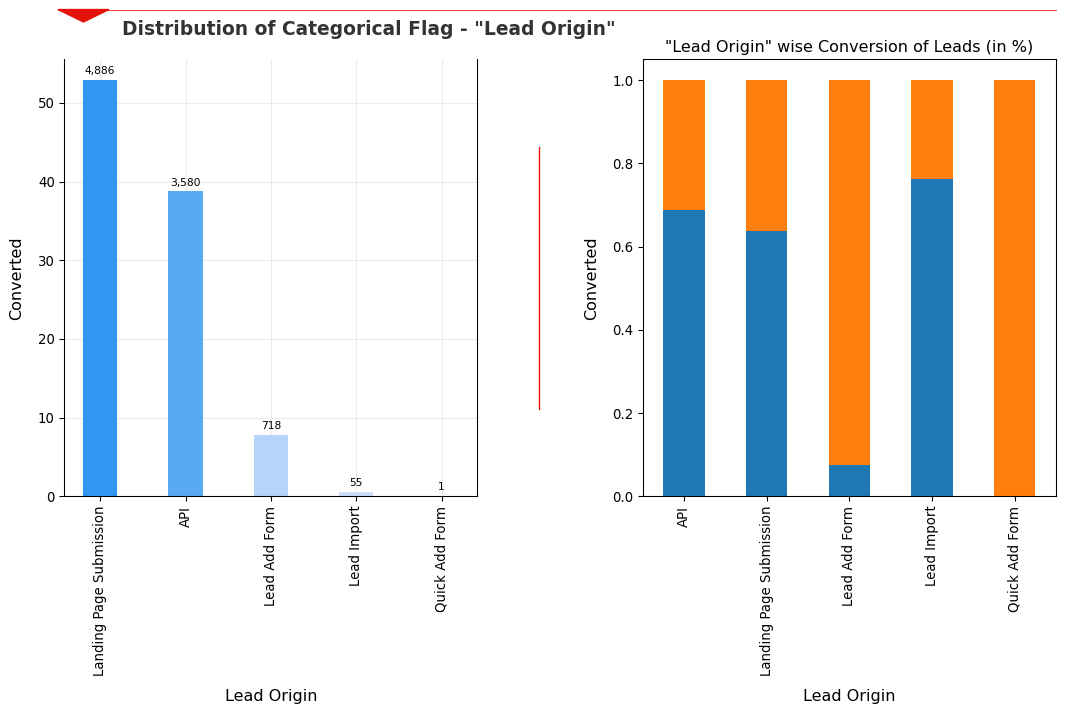

The P-Value of ChiSq Test: 1.93831790477878e-211
Independent variable - "Lead Origin" is correlated to target variable - "Converted"



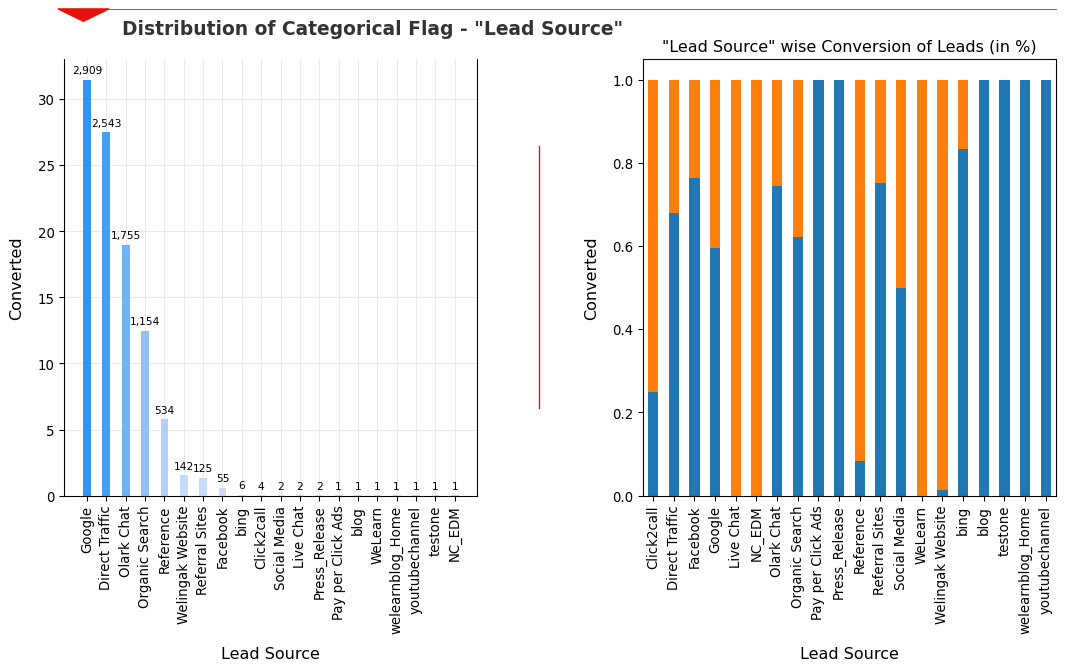

The P-Value of ChiSq Test: 2.2610765566902964e-212
Independent variable - "Lead Source" is correlated to target variable - "Converted"



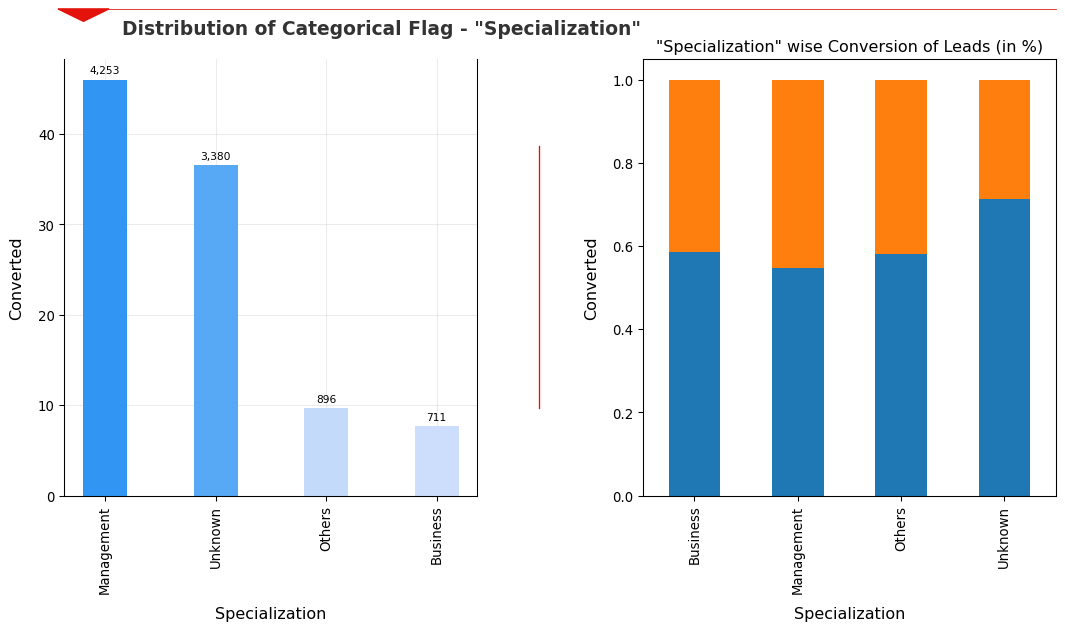

The P-Value of ChiSq Test: 1.4663406229446088e-48
Independent variable - "Specialization" is correlated to target variable - "Converted"



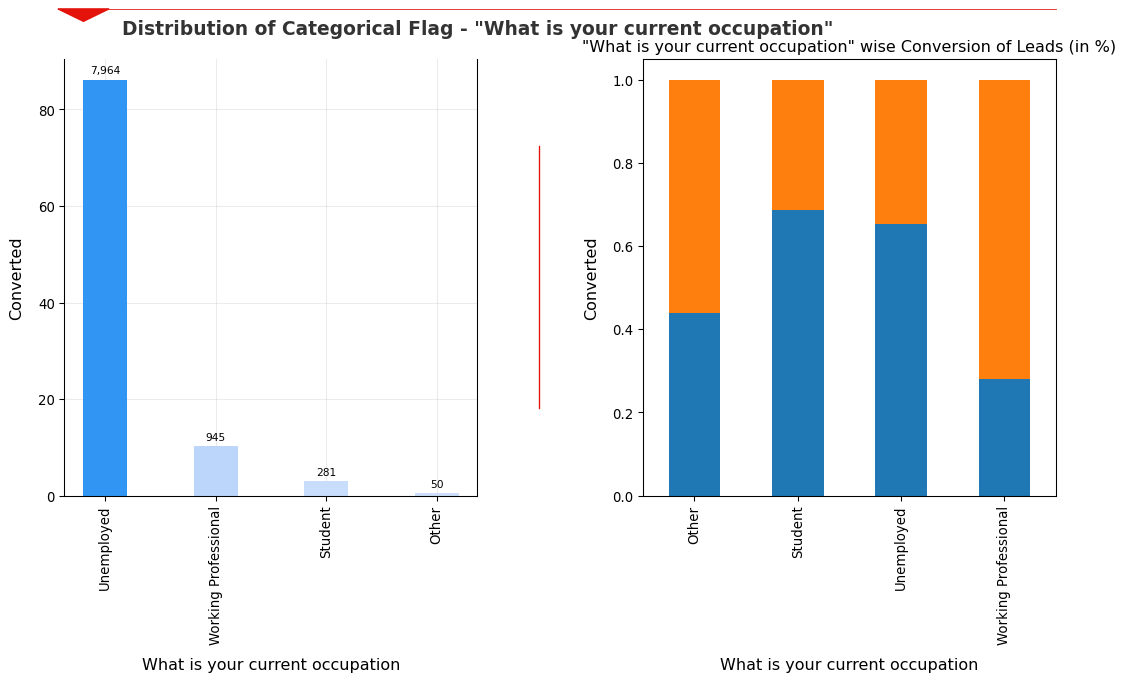

The P-Value of ChiSq Test: 2.6492067018337808e-110
Independent variable - "What is your current occupation" is correlated to target variable - "Converted"



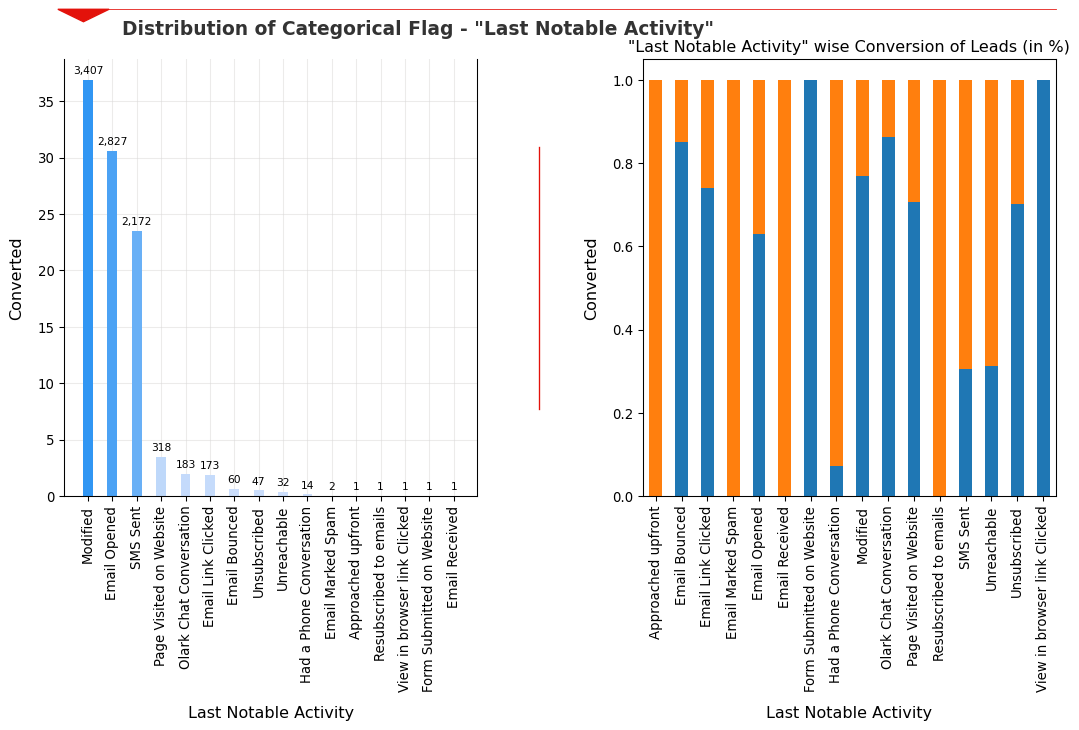

The P-Value of ChiSq Test: 4.239808596196917e-279
Independent variable - "Last Notable Activity" is correlated to target variable - "Converted"



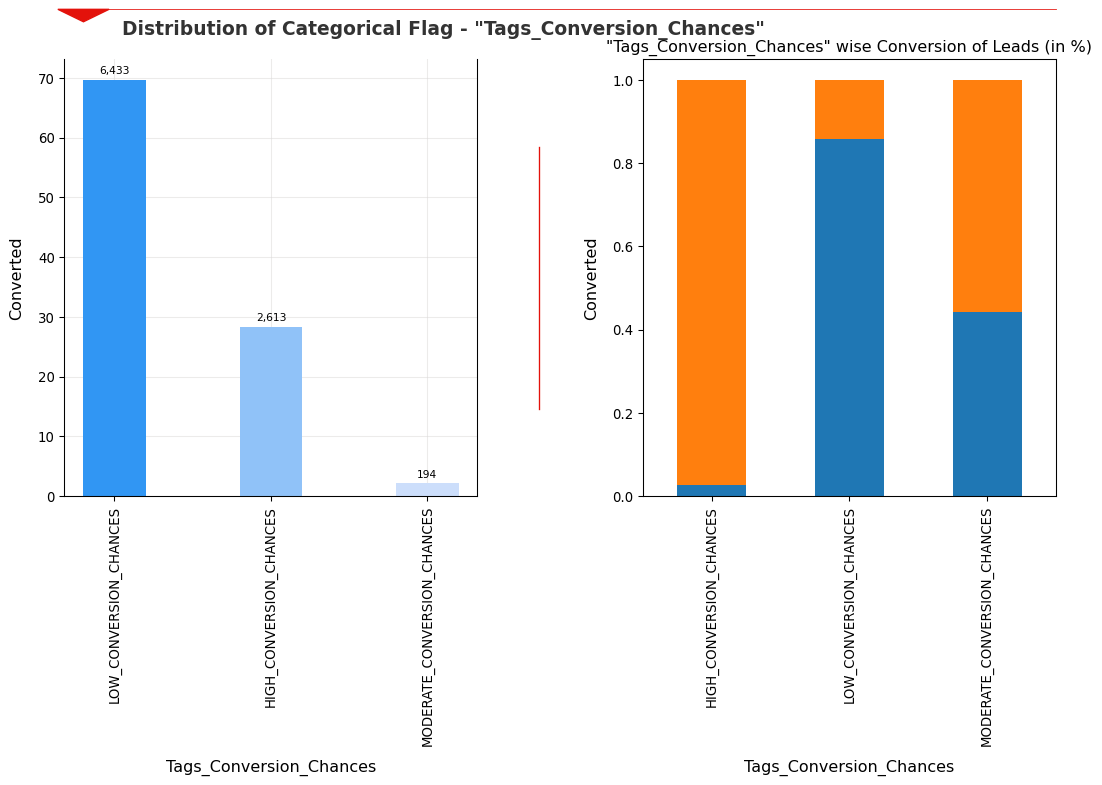

The P-Value of ChiSq Test: 0.0
Independent variable - "Tags_Conversion_Chances" is correlated to target variable - "Converted"



In [65]:
for col in col_cate:
    visualize_cate_data(data, col, 'Converted', 'Distribution of Categorical Flag - "' + col + '"')
    cate_data_analysis(col, display_tables=False)
    print()

In [66]:
data['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Data Visualisation of Categorical Variables, has indicated following insights:</b>
    <ul>
        <li><b>For 'Lead Origin':</b> For 'Quick Add Form', there is only 1 record, therefore merging this category option with 'Lead Add Form'. Low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
        <li><b>For 'Lead Source':</b> Top 5 category options ('Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference') represents 8,895 (96.27%) out of total 9,240 records. Other 15 category options ('Welingak Website', 'Referral Sites', 'Facebook', 'bing', 'Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home', 'WeLearn', 'blog', 'NC_EDM') represents only 3.73%. Therefore, all low frequency options should be merged as 'Others'. Low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
        <li><b>For 'Specialization':</b> No further processing required as univarient analysis. Low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
        <li><b>For 'What is your current occupation':</b> No further processing required as univarient analysis. Low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
        <li><b>For 'Last Notable Activity':</b> Top 3 category options ('Modified', 'Email Opened', 'SMS Sent') represents 8,406 (89.24%) out of total 9,240 records. Other 13 category options ('Page Visited on Website', 'Olark Chat Conversation', 'Email Link Clicked', 'Email Bounced', 'Unsubscribed', 'Unreachable', 'Had a Phone Conversation', 'Email Marked Spam', 'Approached upfront', 'Resubscribed to emails', 'View in browser link Clicked', 'Form Submitted on Website', 'Email Received') represents only 10.76%. Therefore, all low frequency options should be merged as 'Others'. Low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
        <li><b>For 'Tags_Conversion_Chances':</b> No further processing required as univarient analysis. Low P-value of Chi-Square test indicates its a good indicator for target variable (Converted).</li>
    </ul>
<br/>
<br/>
<div style="color: green;font-size:14pt">
<b>Therefore, following actions are being taken for above mentioned columns:</b>
    <ul>
        <li>Making necessary changes in columns 'Lead source', 'Last Notable Activity'.</li>
        <li>Revalidating Univariate analysis for Category Variables.</li>
    </ul>
</div>
</div>

#### Making necessary changes in columns 'Lead source'

In [67]:
data['Lead Source'] = data['Lead Source'].apply(
            lambda x: 'Others' if (x not in ['Google', 'Direct Traffic', 'Olark Chat', 'Organic Search', 'Reference']) else x)

#### Re-Visializing 'Lead Source'

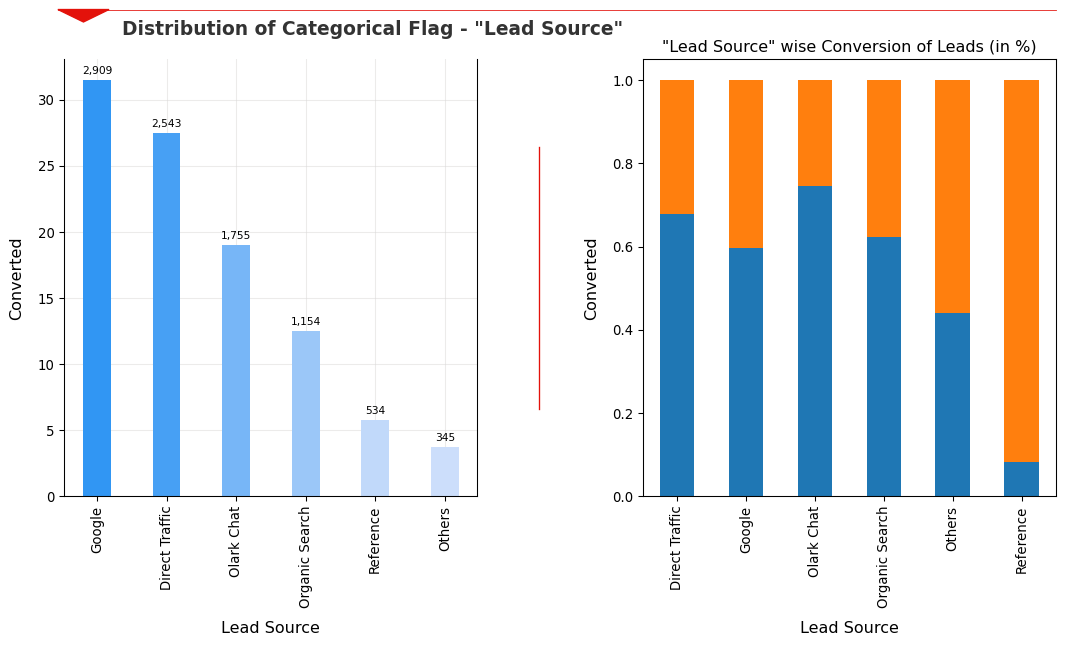

The P-Value of ChiSq Test: 7.308009220747095e-183
Independent variable - "Lead Source" is correlated to target variable - "Converted"


In [68]:
visualize_cate_data(data, 'Lead Source', 'Converted', 'Distribution of Categorical Flag - "' + 'Lead Source' + '"')
cate_data_analysis('Lead Source', display_tables=False)

#### Making necessary changes in columns 'Last Notable Activity'

In [69]:
data['Last Notable Activity'] = data['Last Notable Activity'].apply(
            lambda x: 'Others' if (x not in ['Modified', 'Email Opened', 'SMS Sent']) else x)

#### Re-Visializing 'Last Notable Activity'

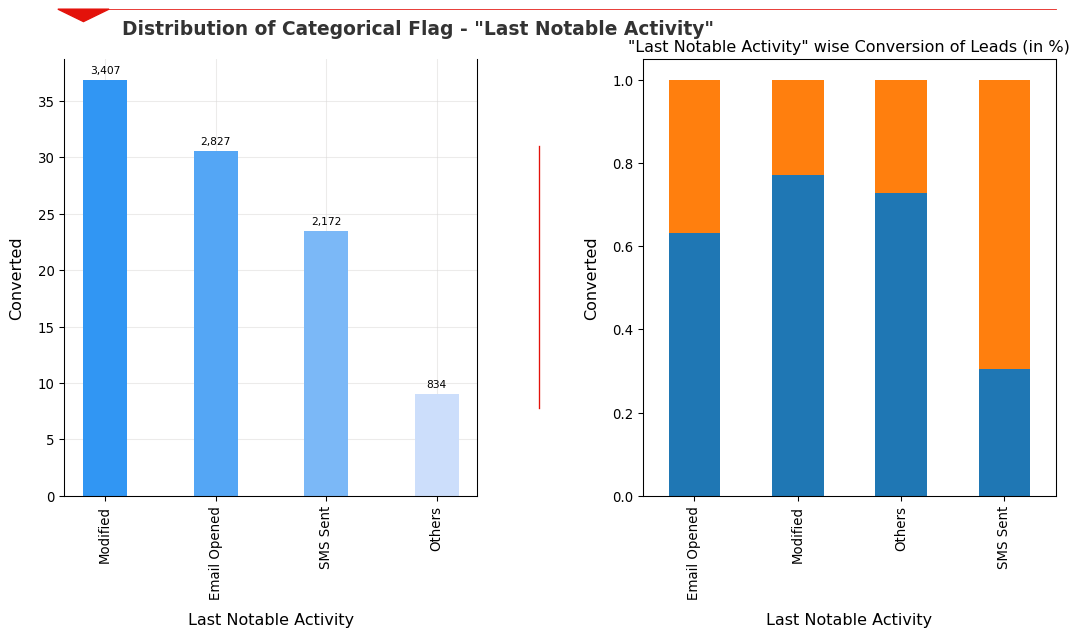

The P-Value of ChiSq Test: 1.5299819003498212e-275
Independent variable - "Last Notable Activity" is correlated to target variable - "Converted"


In [70]:
visualize_cate_data(data, 'Last Notable Activity', 'Converted', 'Distribution of Categorical Flag - "' + 'Last Notable Activity' + '"')
cate_data_analysis('Last Notable Activity', display_tables=False)

## Numerical/Countinous Variables

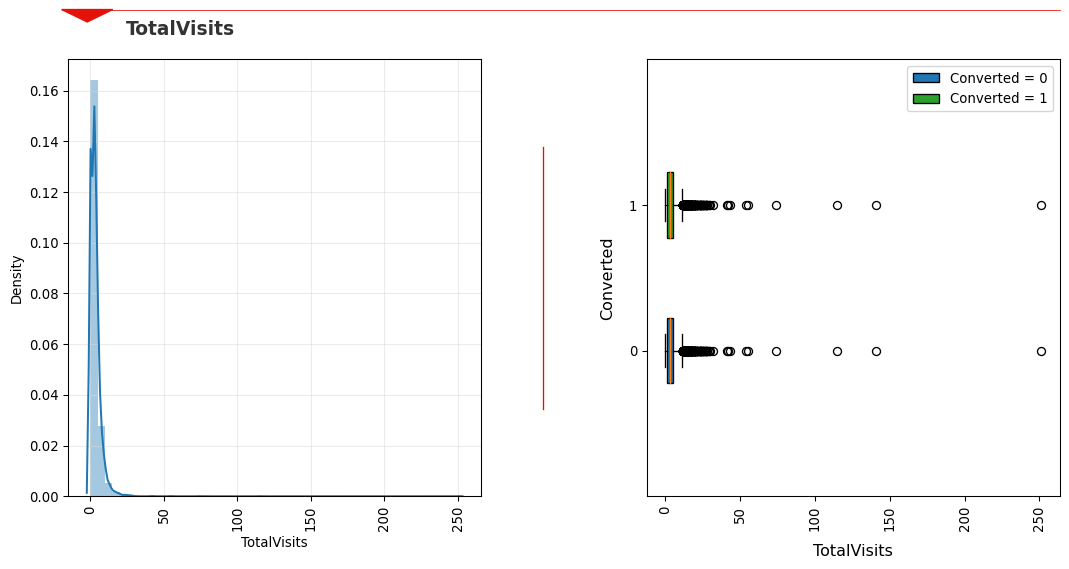

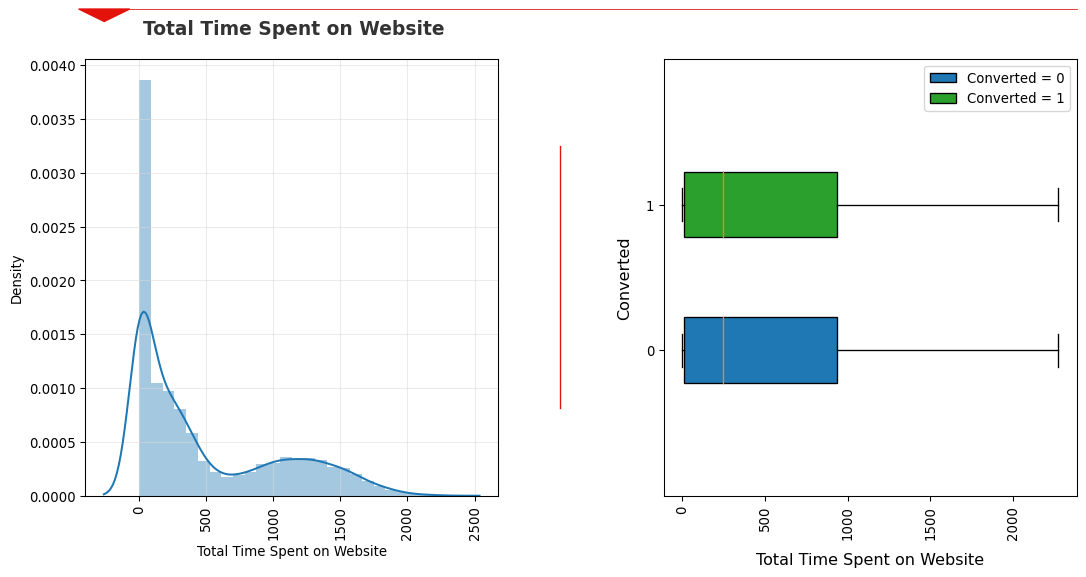

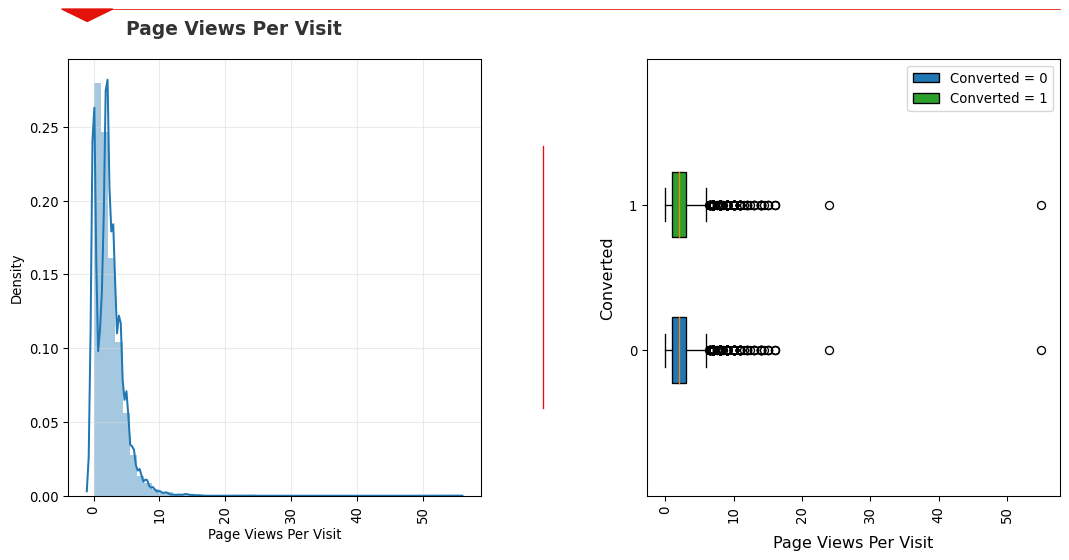

In [71]:
# Looping through all Numerical Variables
for col in col_numr:
    visualize_numr_data(data, col, 'Converted', col)

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Data Visualisation of Numerical Variables, has indicated following insights:</b>
    <ul>
        <li><b>For 'TotalVisits':</b> The column contains outliers and need to be handled.</li>
        <li><b>For 'Total Time Spent on Website':</b> No outliers observed.</li>
        <li><b>For 'Page Views Per Visit':</b> The column contains outliers and need to be handled.</li>
    </ul>
<br/>
<br/>
<div style="color: green;font-size:14pt">
<b>Therefore, following actions are being taken for above mentioned columns:</b>
    <ul>
        <li>Outliers handling for columns 'TotalVisits', 'Page Views Per Visit'.</li>
        <li>Revalidating Univariate analysis for Numerical Variables.</li>
    </ul>
</div>
</div>

## Outlier Handling

#### For 'TotalVisits'

In [72]:
data['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [73]:
data['TotalVisits'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.00])

0.91      8.0
0.92      8.0
0.93      8.0
0.94      9.0
0.95     10.0
0.96     10.0
0.97     11.0
0.98     13.0
0.99     17.0
1.00    251.0
Name: TotalVisits, dtype: float64

From above Value is capped at 99 percentile

In [74]:
Value_CAP = data['TotalVisits'].quantile(.99)
print(Value_CAP)
data['TotalVisits'] = data['TotalVisits'].apply(lambda x: x if x < Value_CAP else Value_CAP)

17.0


#### Re-Visializing 'TotalVisits'

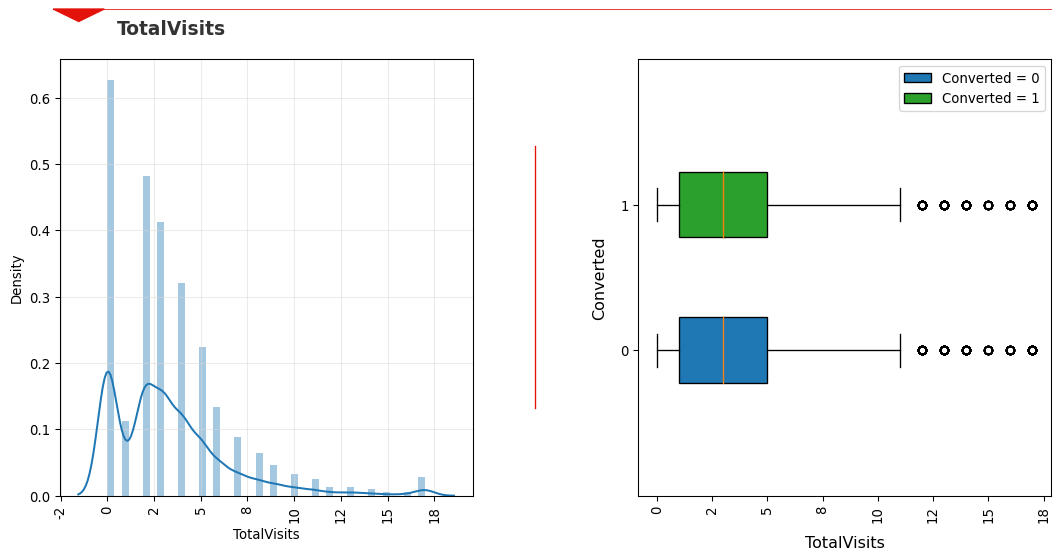

In [75]:
visualize_numr_data(data, 'TotalVisits', 'Converted', 'TotalVisits')

#### For 'Page Views Per Visit'

In [76]:
data['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [77]:
data['Page Views Per Visit'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.00])

0.91     5.0
0.92     5.0
0.93     5.0
0.94     6.0
0.95     6.0
0.96     6.0
0.97     7.0
0.98     8.0
0.99     9.0
1.00    55.0
Name: Page Views Per Visit, dtype: float64

From above Value is capped at 99 percentile

In [78]:
Value_CAP = data['Page Views Per Visit'].quantile(.99)
print(Value_CAP)
data['Page Views Per Visit'] = data['Page Views Per Visit'].apply(lambda x: x if x < Value_CAP else Value_CAP)

9.0


#### Re-Visializing 'Page Views Per Visit'

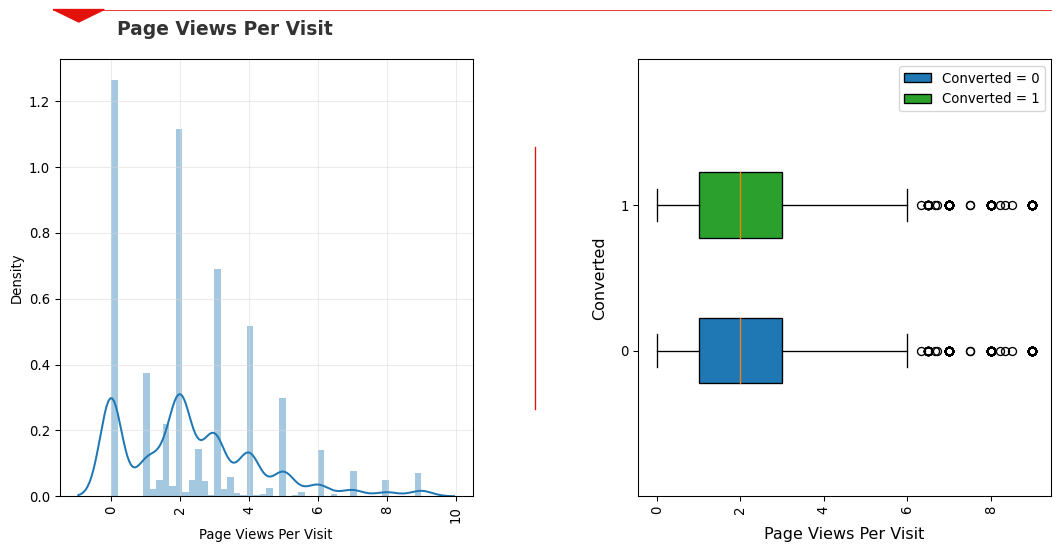

In [79]:
visualize_numr_data(data, 'Page Views Per Visit', 'Converted', 'Page Views Per Visit')

## <font color='#00008B'>Multivariate analysis - Numerical Variables</font>

### <font color='#00008B'>Correlation between Numerical Variables</font>

In [80]:
# Correlation Matrix
numr_corr0 = data[col_numr].corr()
numr_corr0

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
TotalVisits,1.000000,0.324556,0.706203
Total Time Spent on Website,0.324556,1.000000,0.336715
Page Views Per Visit,0.706203,0.336715,1.000000


#### Corr Heatmap

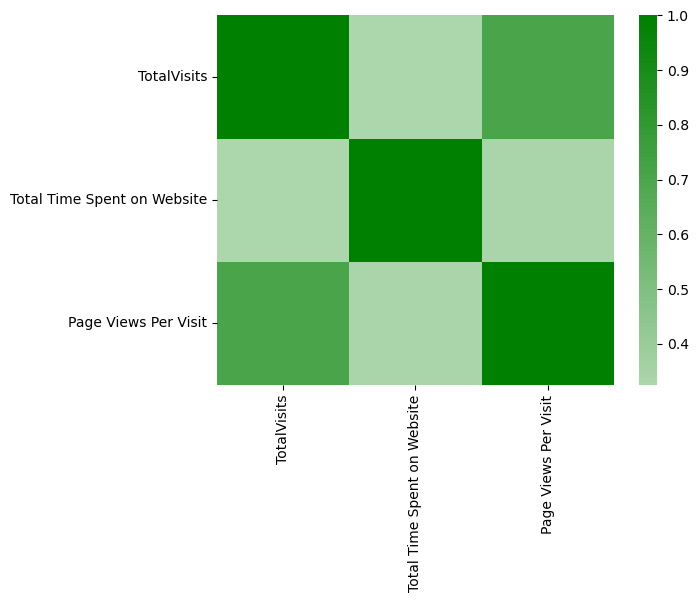

In [81]:
# Red / Green Color Map
cmap_corr = mpl.colors.LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)

# Plotting Heatmap
sns.heatmap(numr_corr0, cmap=cmap_corr, center=0)
plt.show()

### <font color='#00008B'>Pair plot</font>

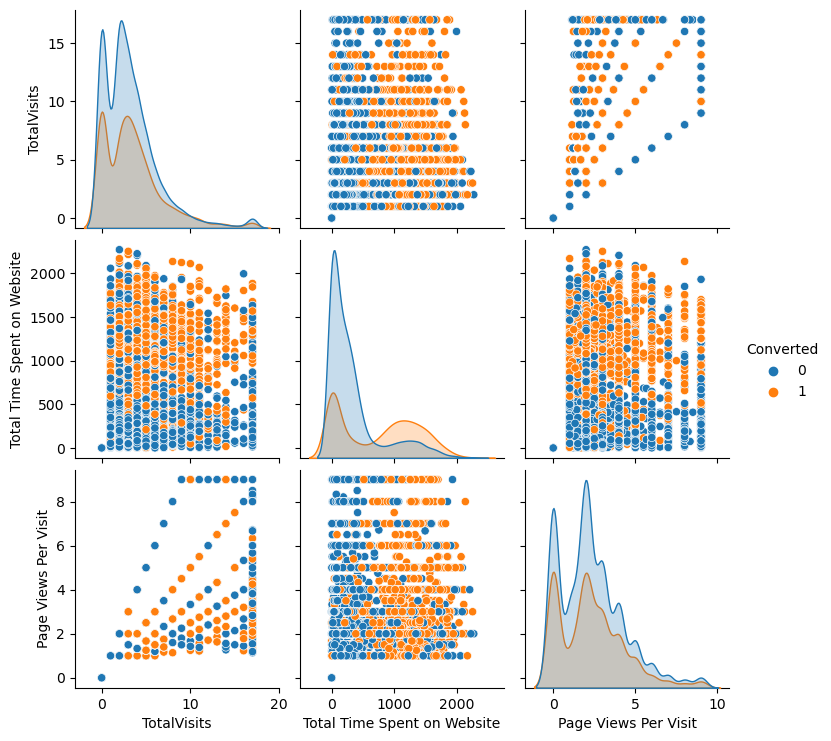

In [82]:
sns.pairplot(data, vars=col_numr, hue='Converted')                                  
plt.show()

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Multivarient analysis of Numerical Variables indicated that 'TotalVisits' and 'Page Views Per Visit' are highly correlated (more than 70% correlation coefficient) to each other.</b>
<br/>
<br/>
<div style="color: red;font-size:14pt">
<b>Therefore, following actions are being taken for above mentioned columns:</b>
    <ul>
        <li>Dropping column 'TotalVisits'.</li>
    </ul>
</div>
</div>

In [83]:
data.drop(['TotalVisits'], axis=1, inplace=True)

# edit col_numr list
col_numr.remove('TotalVisits')

## <font color='#00008B'>Multivariate analysis - Categorical Variables</font>

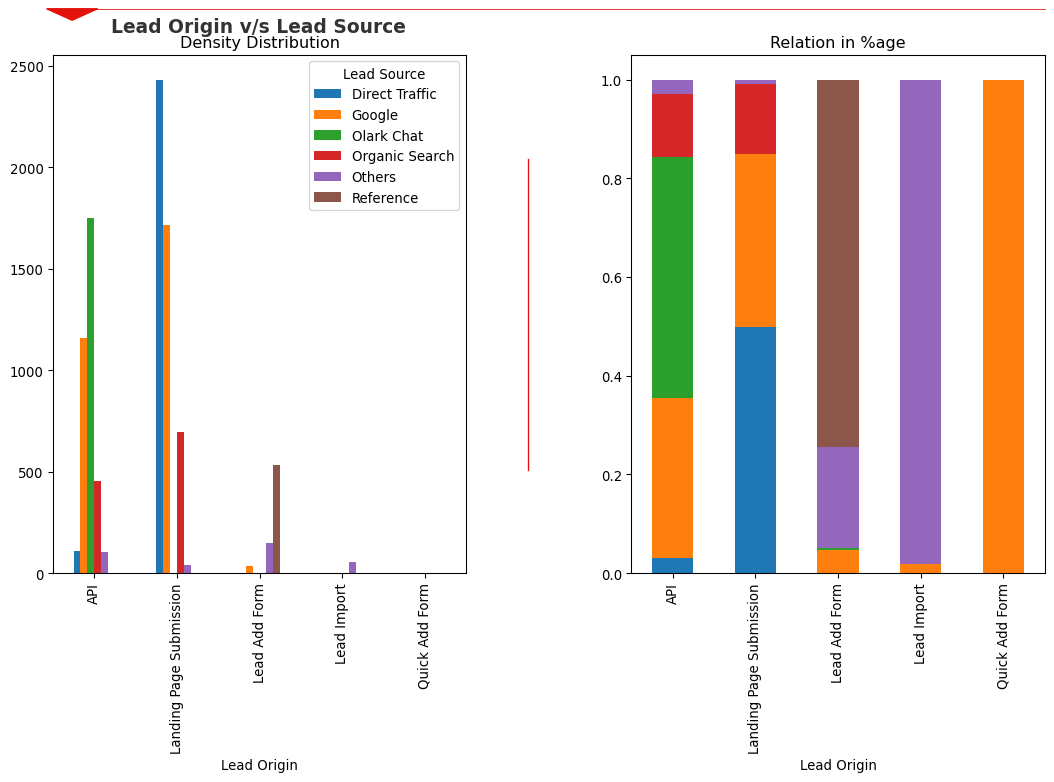

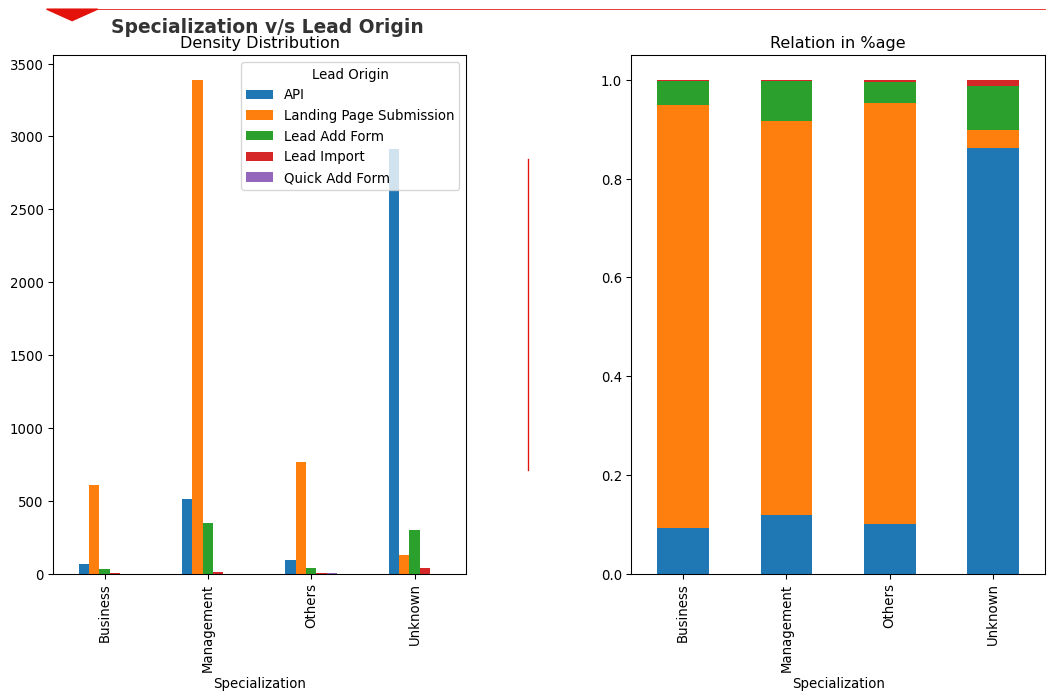

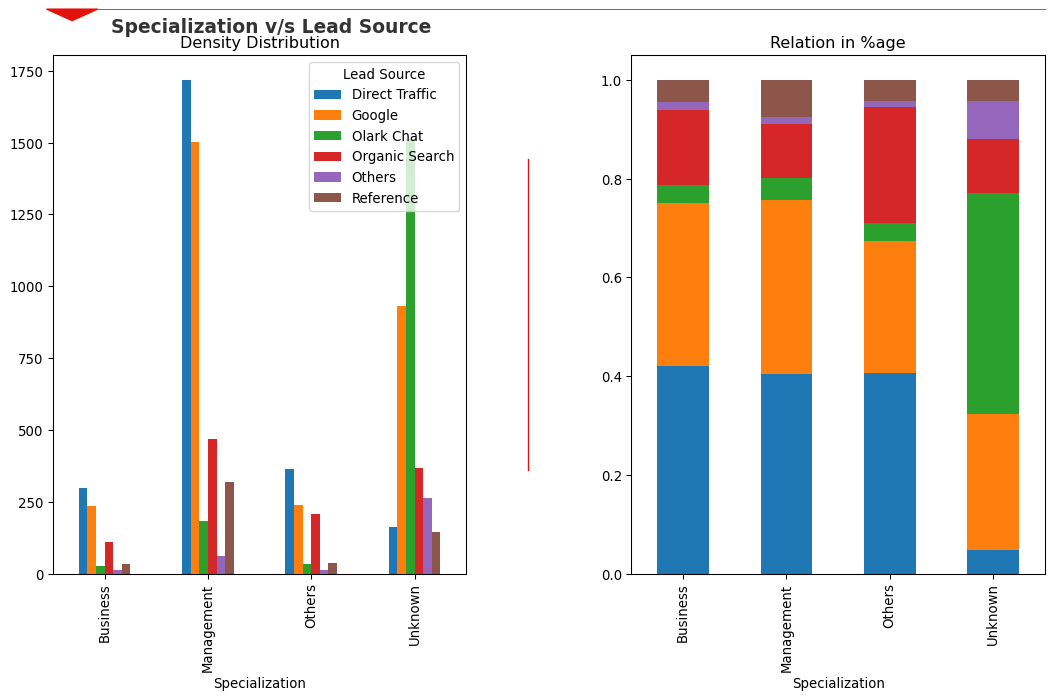

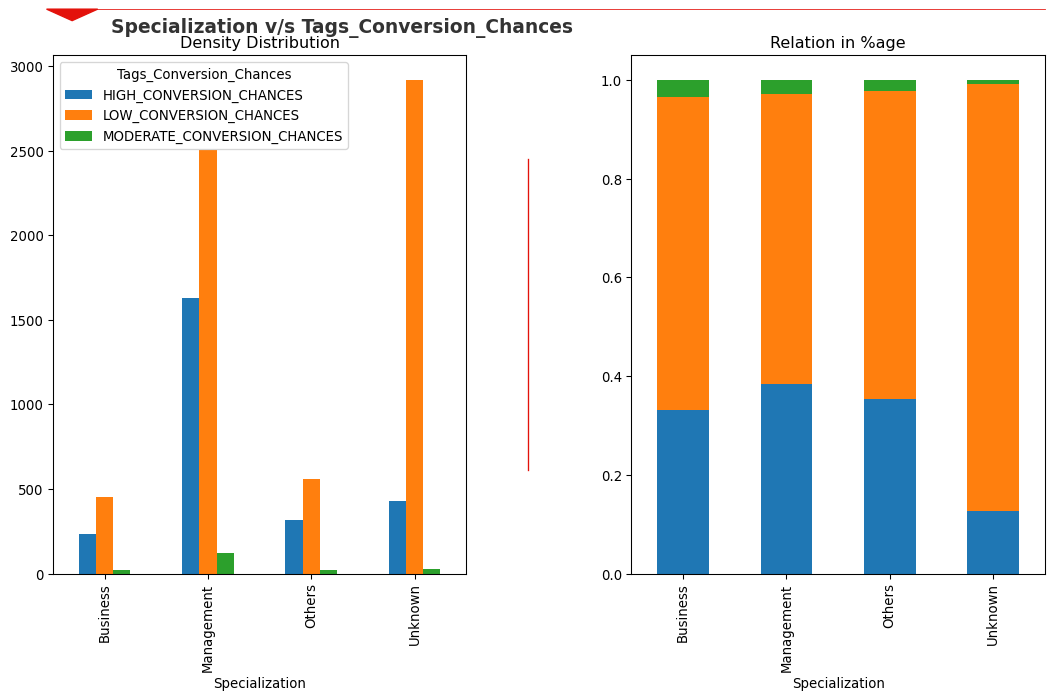

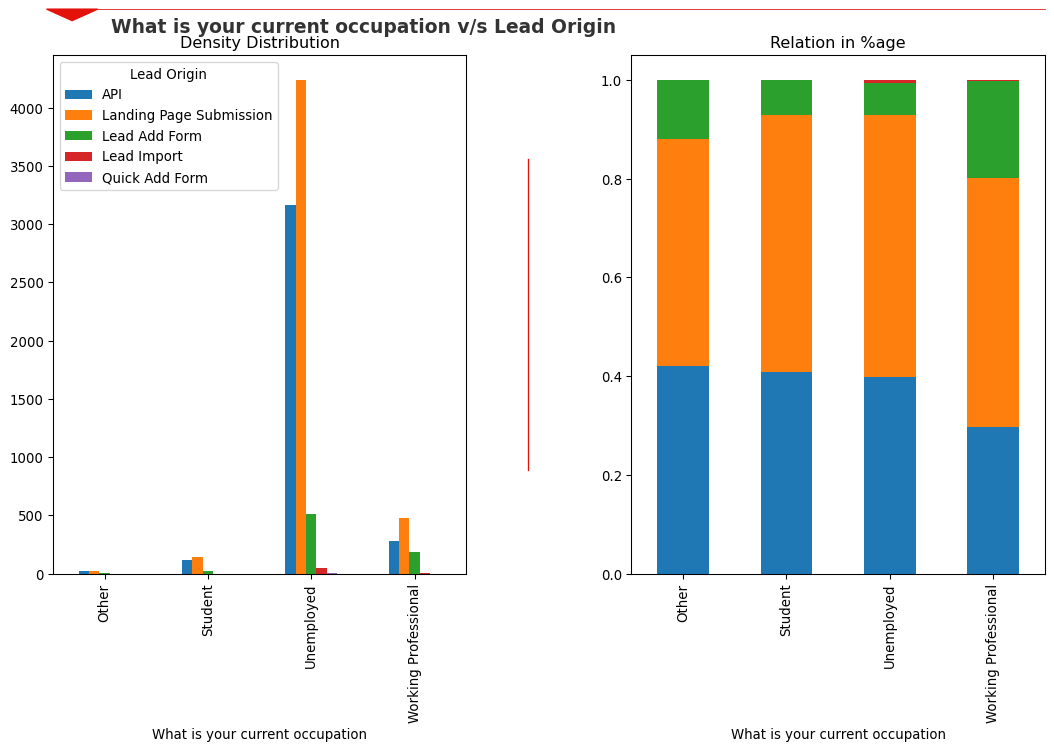

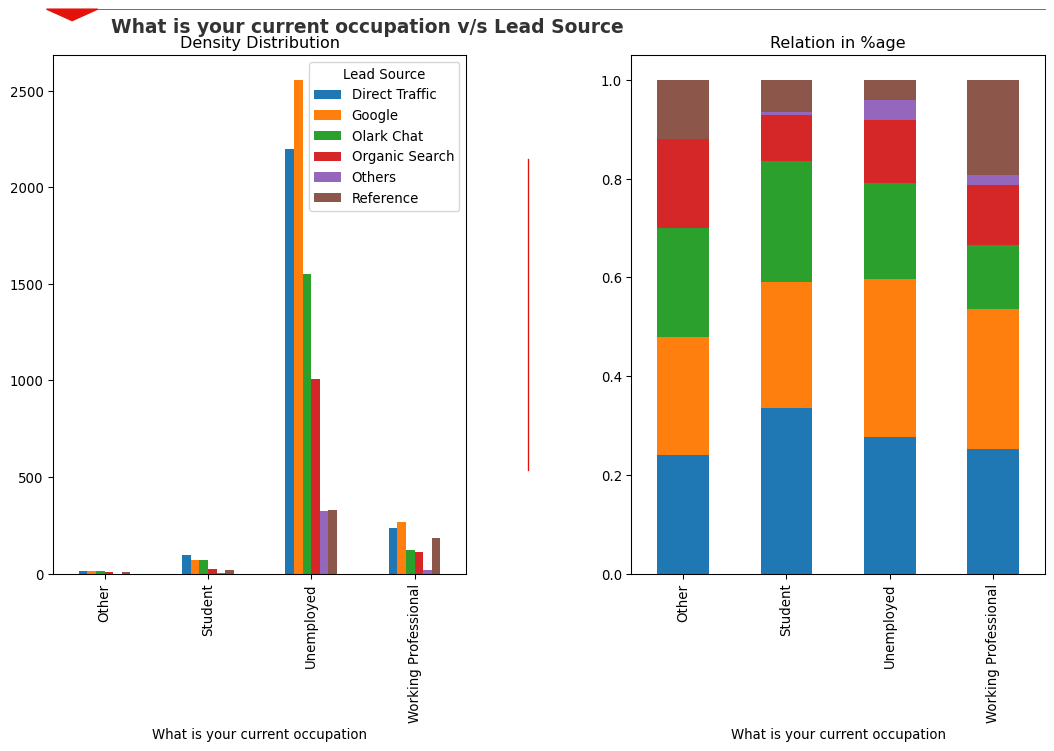

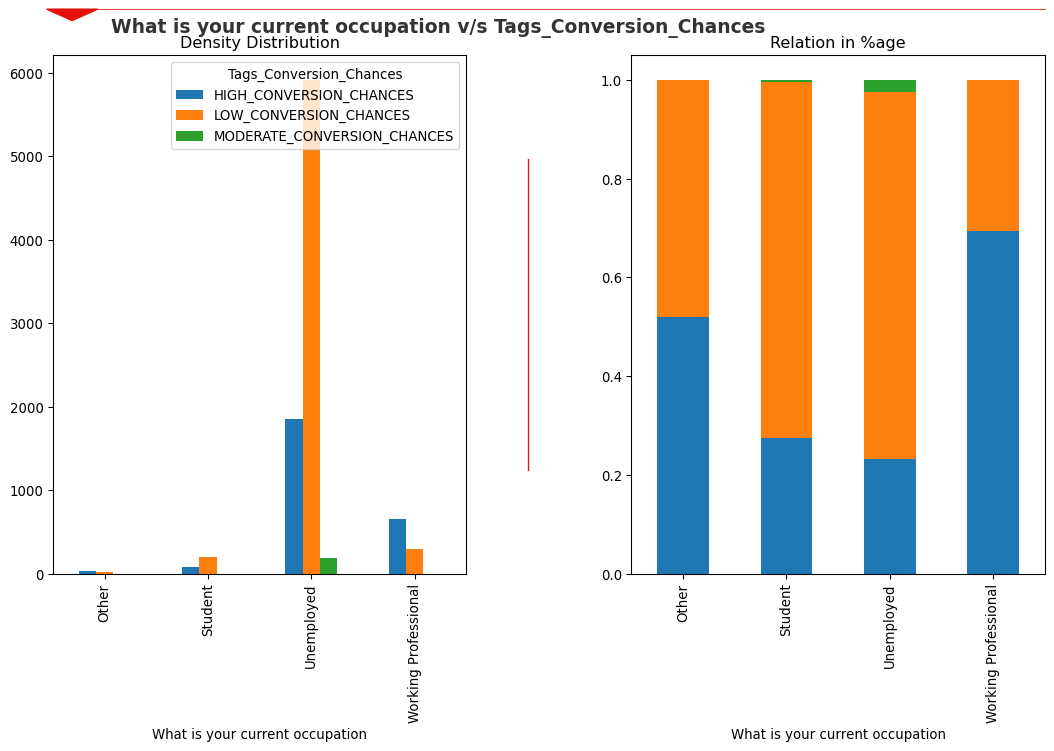

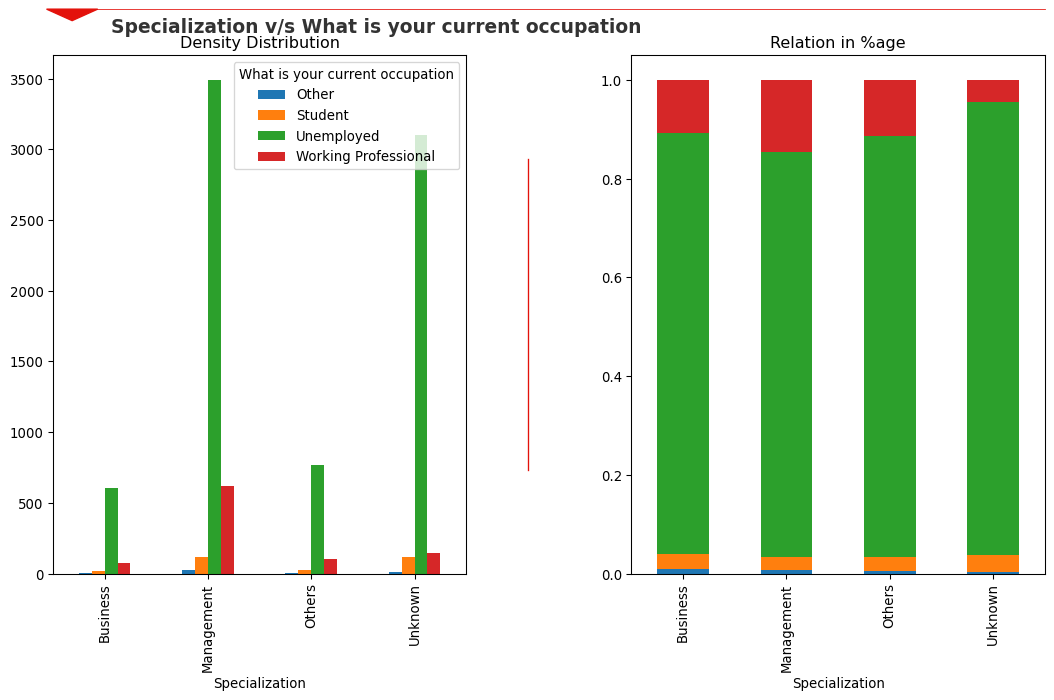

In [84]:
col_cate_cate = [
    ['Lead Origin', 'Lead Source'], 
    ['Specialization', 'Lead Origin'], 
    ['Specialization', 'Lead Source'],  
    ['Specialization', 'Tags_Conversion_Chances'], 
    ['What is your current occupation', 'Lead Origin'], 
    ['What is your current occupation', 'Lead Source'],  
    ['What is your current occupation', 'Tags_Conversion_Chances'], 
    ['Specialization', 'What is your current occupation']
]
# Looping through Bivariant Analysis - Categorical vs Categorical
for entry in col_cate_cate:
    visualize_bivarient_data(data, entry[0], entry[1], 'Converted', 'Converted')

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Bivariant analysis (categorical v/s categorical), has indicated following insights (more comparisons are tried as compare to listed below):</b>
    <ul>
        <li><b>For 'Lead Origin' v/s 'Lead Source':</b>
        	<ul>
        	<li>'Direct Traffic' in 'Lead Source' mostly corrospond to 'Landing Page Submission'.</li>
        	<li>'Olark Chat' in 'Lead Source' is part of 'API' in 'Lead Origin'</li>
        	<li>'Reference' in 'Lead Source' is part of 'Lead Add Form' in 'Lead Origin'</li>
        	<li><i>It is found that there is good correlation between two columns, it should be validated through variance inflation factor (VIF).</i></li>
        	</ul>
        </li>
        <li><b>For 'Specialization' v/s 'Lead Origin':</b>
        	<ul>
        	<li>'Landing Page Submission' dominate in all the category options where 'Specialization' is known.</li>
        	<li>Leads that are coming from 'API', are mostly with unknown 'Specialization'.</li>
        	</ul>
        </li>
        <li><b>For 'Specialization' v/s 'Tags_Conversion_Chances':</b>
        	<ul>
        	<li>There is almost even distribution of category options from 'Tags_Conversion_Chances' over 'Specialization'.</li>
        	</ul>
        </li>
        <li><b>For 'What is your current occupation' v/s 'Tags_Conversion_Chances':</b>
        	<ul>
        	<li>Working Professionals have High Conversion Chances in terms of percentage.</li>
        	</ul>
        </li>
        <li><b>For 'Specialization' v/s 'What is your current occupation':</b>
        	<ul>
        	<li>Most of 'Unemployed' members from lead have 'Management' as 'Specialization'.</li>
        	</ul>
        </li>
    </ul>
</div>
</div>

# <font color='#00008B'>Data Preparation</font>

## <font color='#00008B'>Replacing categorical variables with dummy variables</font>

#### For 'Lead Origin' column

In [85]:
data['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [86]:
# Create dummy columns
dummy_variables = pd.get_dummies(data['Lead Origin'], prefix='Lead_Origin') # No drop_first

# added to main dataframe
data = pd.concat([data, dummy_variables], axis=1)

# drop categorical column
data.drop('Lead Origin', inplace=True, axis=1)

# Selective Drop of 'Quick Add Form'
data.drop('Lead_Origin_Quick Add Form', inplace=True, axis=1)

#### For 'Lead Source' column

In [87]:
data['Lead Source'].value_counts()

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Reference          534
Others             345
Name: Lead Source, dtype: int64

In [88]:
# Create dummy columns
dummy_variables = pd.get_dummies(data['Lead Source'], prefix='Lead_Source') # No drop_first

# added to main dataframe
data = pd.concat([data, dummy_variables], axis=1)

# drop categorical column
data.drop('Lead Source', inplace=True, axis=1)

# Selective Drop of 'Others'
data.drop('Lead_Source_Others', inplace=True, axis=1)

#### For 'Specialization' column

In [89]:
data['Specialization'].value_counts()

Management    4253
Unknown       3380
Others         896
Business       711
Name: Specialization, dtype: int64

In [90]:
# Create dummy columns
dummy_variables = pd.get_dummies(data['Specialization'], prefix='Specialization') # No drop_first

# added to main dataframe
data = pd.concat([data, dummy_variables], axis=1)

# drop categorical column
data.drop('Specialization', inplace=True, axis=1)

# Selective Drop of 'Unknown'
data.drop('Specialization_Unknown', inplace=True, axis=1)

#### For 'What is your current occupation' column

In [91]:
data['What is your current occupation'].value_counts()

Unemployed              7964
Working Professional     945
Student                  281
Other                     50
Name: What is your current occupation, dtype: int64

In [92]:
# Create dummy columns
dummy_variables = pd.get_dummies(data['What is your current occupation'], prefix='Occupation') # No drop_first

# added to main dataframe
data = pd.concat([data, dummy_variables], axis=1)

# drop categorical column
data.drop('What is your current occupation', inplace=True, axis=1)

# Selective Drop of 'Other'
data.drop('Occupation_Other', inplace=True, axis=1)

#### For 'Last Notable Activity' column

In [93]:
data['Last Notable Activity'].value_counts()

Modified        3407
Email Opened    2827
SMS Sent        2172
Others           834
Name: Last Notable Activity, dtype: int64

In [94]:
# Create dummy columns
dummy_variables = pd.get_dummies(data['Last Notable Activity'], prefix='Last_Notable_Activity') # No drop_first

# added to main dataframe
data = pd.concat([data, dummy_variables], axis=1)

# drop categorical column
data.drop('Last Notable Activity', inplace=True, axis=1)

# Selective Drop of 'Others'
data.drop('Last_Notable_Activity_Others', inplace=True, axis=1)

#### For 'Tags_Conversion_Chances' column

In [95]:
data['Tags_Conversion_Chances'].value_counts()

LOW_CONVERSION_CHANCES         6433
HIGH_CONVERSION_CHANCES        2613
MODERATE_CONVERSION_CHANCES     194
Name: Tags_Conversion_Chances, dtype: int64

In [96]:
# Create dummy columns
dummy_variables = pd.get_dummies(data['Tags_Conversion_Chances'], prefix='Tags_Conversion_Chances') # No drop_first

# added to main dataframe
data = pd.concat([data, dummy_variables], axis=1)

# drop categorical column
data.drop('Tags_Conversion_Chances', inplace=True, axis=1)

# Selective Drop of 'Quick Add Form'
data.drop('Tags_Conversion_Chances_MODERATE_CONVERSION_CHANCES', inplace=True, axis=1)

### Making column 'Lead Number' as index

In [97]:
data.set_index('Lead Number', inplace = True)

In [98]:
data.head()

,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Specialization_Business,Specialization_Management,Specialization_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES,Tags_Conversion_Chances_LOW_CONVERSION_CHANCES
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
660737,0,0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
660728,0,0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1
660727,0,1,1532,2.0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0
660719,0,0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1
660681,0,1,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


## <font color='#00008B'>Splitting the Data into Training and Testing Sets</font>

In [99]:
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 1)

In [100]:
df_train.head()

,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Specialization_Business,Specialization_Management,Specialization_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES,Tags_Conversion_Chances_LOW_CONVERSION_CHANCES
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
609431,0,0,360,2.5,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
631817,0,0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
596164,0,0,7,2.0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
646570,0,0,76,2.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
643974,1,0,96,2.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [101]:
df_test.head()

,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Specialization_Business,Specialization_Management,Specialization_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES,Tags_Conversion_Chances_LOW_CONVERSION_CHANCES
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
639211,0,1,0,0.00,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0
590711,0,1,1503,2.00,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0
644174,0,1,1024,1.50,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
641392,0,0,186,2.00,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1
587955,0,1,1725,3.25,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1


## <font color='#00008B'>Rescaling the Features</font>

In [102]:
scaler = StandardScaler()

df_train[col_numr] = scaler.fit_transform(df_train[col_numr])

In [103]:
df_train.head()

,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Specialization_Business,Specialization_Management,Specialization_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES,Tags_Conversion_Chances_LOW_CONVERSION_CHANCES
Lead Number,,,,,,,,,,,,,,,,,,,,,,,,,
609431,0,0,-0.225161,0.084437,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
631817,0,0,-0.886868,-1.168999,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
596164,0,0,-0.874002,-0.166250,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
646570,0,0,-0.747174,-0.166250,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1
643974,1,0,-0.710413,-0.166250,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1


In [104]:
df_train.describe()

,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead_Origin_API,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Add Form,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Specialization_Business,Specialization_Management,Specialization_Others,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES,Tags_Conversion_Chances_LOW_CONVERSION_CHANCES
count,6468.000000,6468.000000,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.081478,0.381262,-2.087247e-17,-4.723769e-17,0.317563,0.388683,0.528602,0.077613,0.004947,0.275974,0.310761,0.195114,0.123531,0.057050,0.077304,0.459029,0.097248,0.029839,0.863482,0.100959,0.310142,0.366729,0.233457,0.278602,0.699443
std,0.273589,0.485734,1.000077e+00,1.000077e+00,0.465565,0.487489,0.499220,0.267582,0.070169,0.447038,0.462841,0.396319,0.329071,0.231956,0.267093,0.498357,0.296318,0.170157,0.343365,0.301297,0.462587,0.481949,0.423063,0.448346,0.458536
min,0.000000,0.000000,-8.868681e-01,-1.168999e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-8.721635e-01,-6.676247e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,-4.310255e-01,-1.662504e-01,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,8.059990e-01,3.351239e-01,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,3.289238e+00,3.343370e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Checking the Conversion Rate

In [105]:
converion = (sum(data['Converted'])/len(data['Converted'].index))*100
converion

38.53896103896104

#### Check Correlation amoung all variables

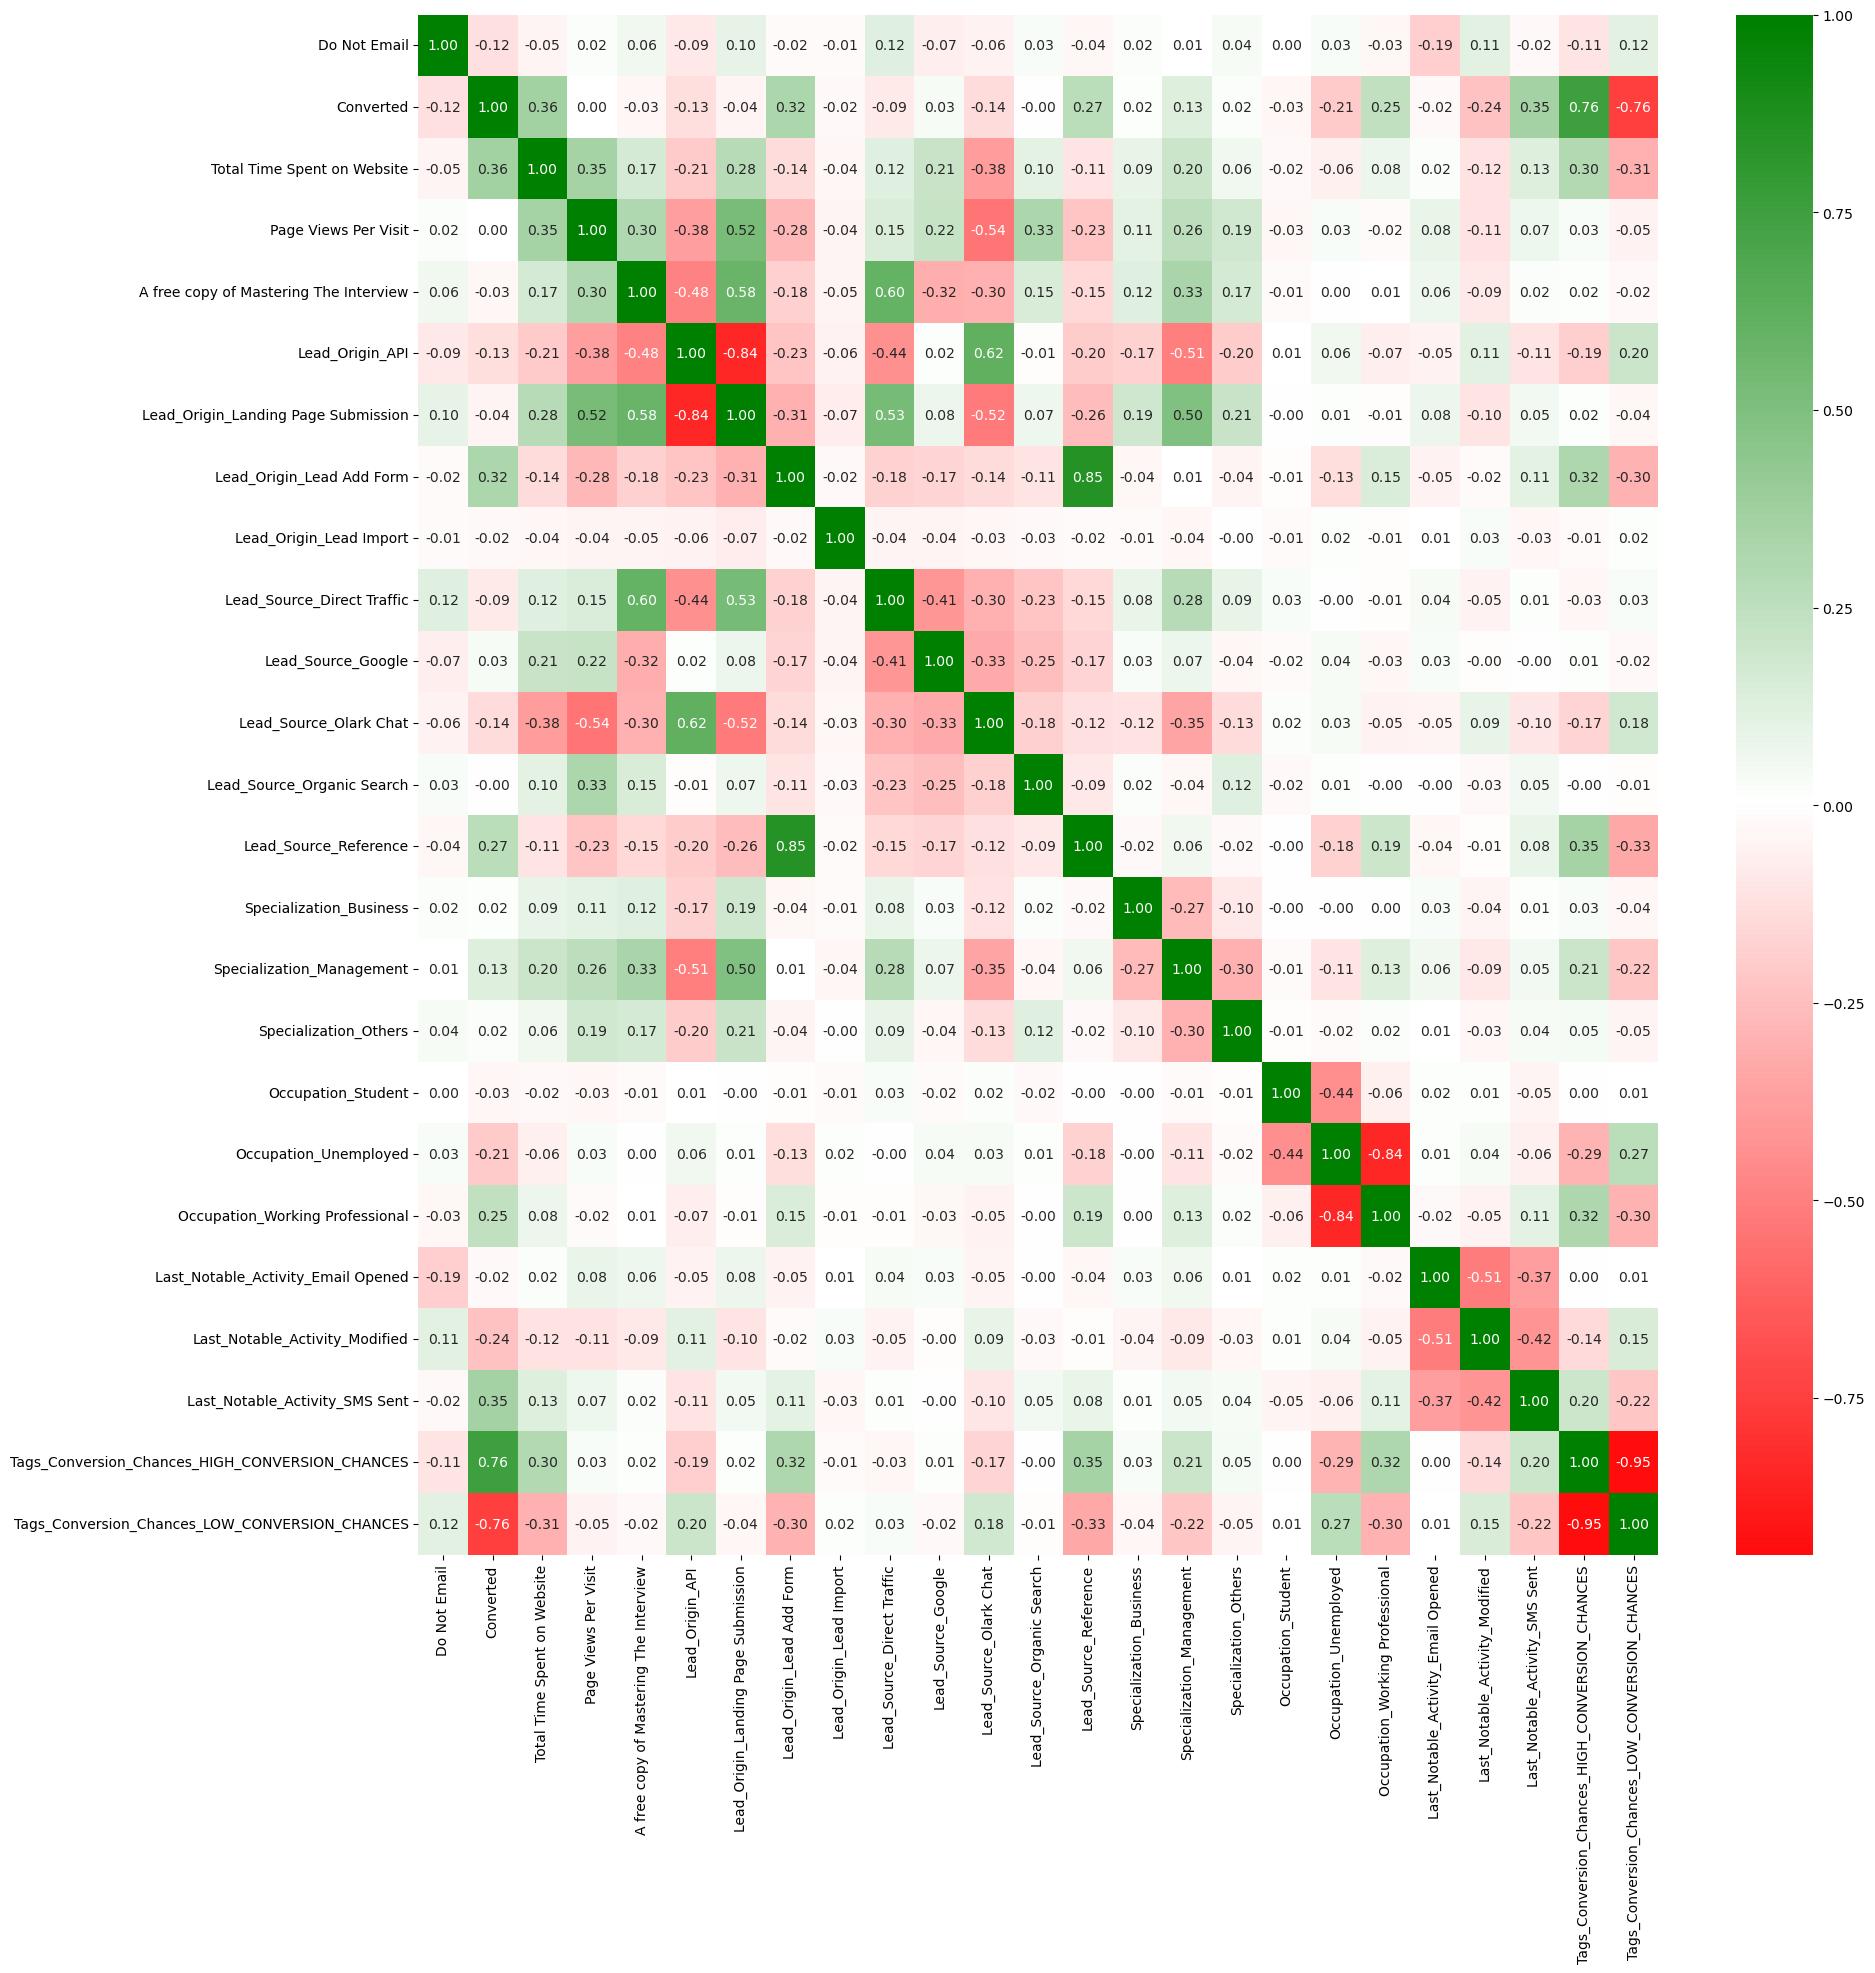

In [106]:
# Plotting Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot = True, fmt=".2f", cmap=cmap_corr, center=0)
plt.show()

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Following column pairs are highly correlated (with correlation coefficient > 60%):</b>
    <ul>
        <li>'Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES' and 'Tags_Conversion_Chances_LOW_CONVERSION_CHANCES' with correlation coefficient 0.95</li>
        <li>'Lead_Source_Reference' and 'Lead_Origin_Lead Add Form' with correlation coefficient 0.85</li>
        <li>'Lead_Origin_Landing Page Submission' and 'Lead_Origin_API' with correlation coefficient -0.84</li>
        <li>'Occupation_Working Professional' and 'Occupation_Unemployed' with correlation coefficient -0.84</li>
        <li>'Lead_Source_Olark Chat' and 'Lead_Origin_API' with correlation coefficient 0.62</li>
        <li>'Lead_Source_Direct Traffic' and 'A free copy of Mastering The Interview' with correlation coefficient 0.60</li>
    </ul>
</div>
</div>

#### Dropping highly correlated dummy variables

In [107]:
df_test = df_test.drop(['Tags_Conversion_Chances_LOW_CONVERSION_CHANCES', 
                        'Lead_Origin_Lead Add Form', 
                        'Lead_Origin_API', 
                        'Occupation_Unemployed', 
                        'A free copy of Mastering The Interview'], 1)
df_train = df_train.drop(['Tags_Conversion_Chances_LOW_CONVERSION_CHANCES', 
                          'Lead_Origin_Lead Add Form', 
                          'Lead_Origin_API', 
                          'Occupation_Unemployed', 
                          'A free copy of Mastering The Interview'], 1)

<div style="background-color: #F9E79F;font-size:12pt">
<b>Dropping 'Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES'</b>
<br/><br/>
Although it is debatable to keep or not to keep variable that is drived from column 'Tags'.<br/>
However, 'Tags' provide very indication based on Historical interaction of sales team, and indicated responses like 'Will revert after reading the email', 'Interested in Next batch', and indications like 'Lost to EINS', 'Closed by Horizzon', 'Lateral student', provide very good conversion rate at later stage. It is good practice by sales team, assumed will continue.
</div>

#### Checking the Correlation Matrix
After dropping highly correlated variables now let's check the correlation matrix again.

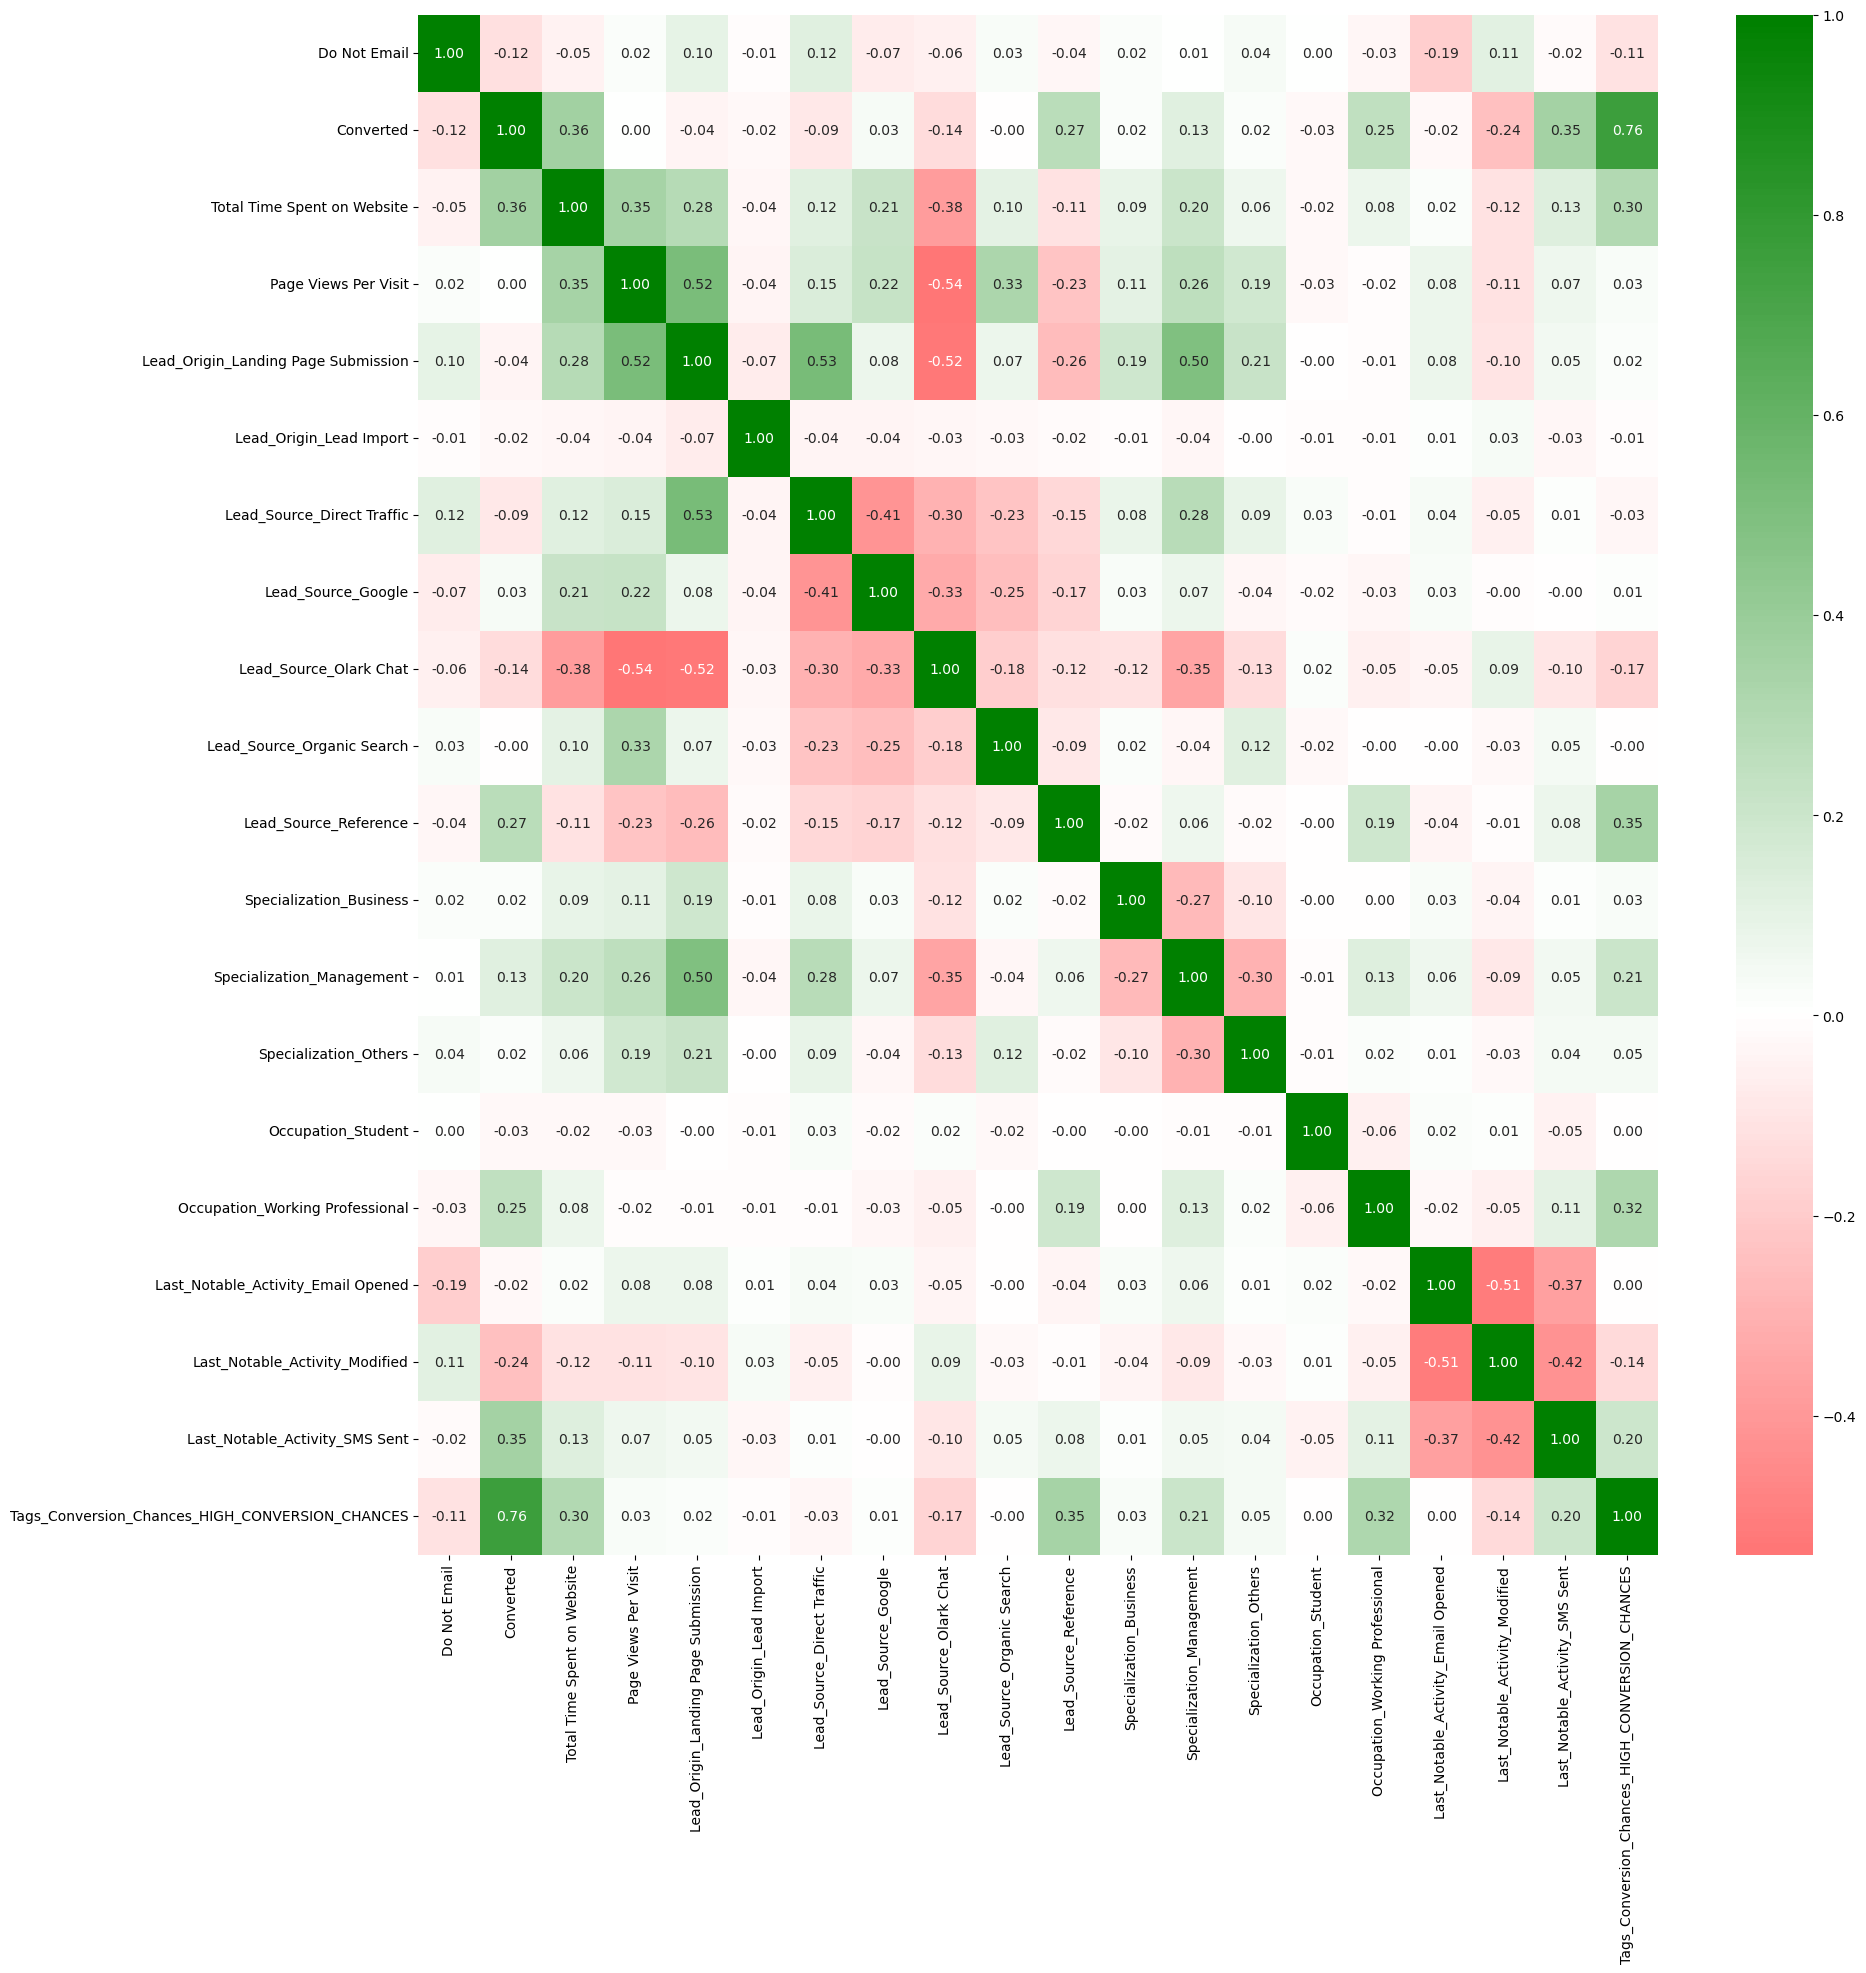

In [108]:
# Plotting Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), annot = True, fmt=".2f", cmap=cmap_corr, center=0)
plt.show()

# <font color='#00008B'>Creating X and y</font>

In [109]:
y_train = df_train[['Converted']]
X_train = df_train.drop('Converted', axis=1)

# Build first logistic model - Taking all Variables

In [110]:
print(X_train.shape)

(6468, 19)


In [111]:
# adding constant term B0
X_train_lm = sm.add_constant(X_train)

# Logistic regression model
logm1 = sm.GLM(y_train, X_train_lm, family = sm.families.Binomial()).fit()

In [112]:
logm1.params

const                                             -0.195812
Do Not Email                                      -0.409778
Total Time Spent on Website                        0.975865
Page Views Per Visit                              -0.251404
Lead_Origin_Landing Page Submission               -0.598018
Lead_Origin_Lead Import                           -2.569727
Lead_Source_Direct Traffic                        -2.582160
Lead_Source_Google                                -2.046786
Lead_Source_Olark Chat                            -1.629394
Lead_Source_Organic Search                        -2.366678
Lead_Source_Reference                             -1.965980
Specialization_Business                           -0.047436
Specialization_Management                         -0.094138
Specialization_Others                             -0.040368
Occupation_Student                                -0.717237
Occupation_Working Professional                    0.145535
Last_Notable_Activity_Email Opened      

In [113]:
display(logm1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1592.4
Date:                Sun, 15 Oct 2023   Deviance:                       3184.8
Time:                        10:09:16   Pearson chi2:                 6.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5670
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.1958      0.247     -0.791      0.429      -0.681       0.289
Do Not Email                                       -0.4098      0.204     -2.007      0.045      -0.810      -0.010
Total Time Spent on Website                         0.9759      0.053     18.346      0.000       0.872       1.080
Page Views Per Visit                               -0.2514      0.069     -3.657      0.000      -0.386      -0.117
Lead_Origin_Landing Page Submission                -0.5980      0.198     -3.024      0.002      -0.986      -0.210
Lead_Origin_Lead Import                            -2.5697      0.839     -3.064      0.002      -4.213      -0.926
Lead_Source_Direct Traffic                         -2.5822      0.238    -10.839      0.000      -3.049      -2.115
Lead_Source_Google                                 -2.0468      0.214     -9.575      0.000      -2.466      -1.628
Lead_Source_Olark Chat                             -1.6294      0.217     -7.525      0.000      -2.054      -1.205
Lead_Source_Organic Search                         -2.3667      0.244     -9.710      0.000      -2.844      -1.889
Lead_Source_Reference                              -1.9660      0.359     -5.477      0.000      -2.670      -1.262
Specialization_Business                            -0.0474      0.243     -0.195      0.846      -0.525       0.430
Specialization_Management                          -0.0941      0.185     -0.509      0.611      -0.457       0.268
Specialization_Others                              -0.0404      0.243     -0.166      0.868      -0.516       0.435
Occupation_Student                                 -0.7172      0.336     -2.133      0.033      -1.376      -0.058
Occupation_Working Professional                     0.1455      0.205      0.710      0.478      -0.256       0.548
Last_Notable_Activity_Email Opened                  0.5909      0.191      3.092      0.002       0.216       0.965
Last_Notable_Activity_Modified                     -0.3864      0.194     -1.990      0.047      -0.767      -0.006
Last_Notable_Activity_SMS Sent                      2.4642      0.192     12.831      0.000       2.088       2.841
Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES     5.7192      0.182     31.457      0.000       5.363       6.076
===================================================================================================================
"""

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: There are few variables for which P-value is above range, So, will perform RFE for automatic feature selection.</b>
</div>

## Feature Selection Using RFE

In [114]:
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=11)
rfe = rfe.fit(X_train, y_train)

In [115]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead_Origin_Landing Page Submission', True, 1),
 ('Lead_Origin_Lead Import', True, 1),
 ('Lead_Source_Direct Traffic', True, 1),
 ('Lead_Source_Google', True, 1),
 ('Lead_Source_Olark Chat', True, 1),
 ('Lead_Source_Organic Search', True, 1),
 ('Lead_Source_Reference', True, 1),
 ('Specialization_Business', False, 8),
 ('Specialization_Management', False, 7),
 ('Specialization_Others', False, 9),
 ('Occupation_Student', False, 2),
 ('Occupation_Working Professional', False, 6),
 ('Last_Notable_Activity_Email Opened', True, 1),
 ('Last_Notable_Activity_Modified', False, 3),
 ('Last_Notable_Activity_SMS Sent', True, 1),
 ('Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES', True, 1)]

In [116]:
col_support = X_train.columns[rfe.support_]
col_filter = X_train.columns[~rfe.support_]
col_filter

Index(['Do Not Email', 'Page Views Per Visit', 'Specialization_Business',
       'Specialization_Management', 'Specialization_Others',
       'Occupation_Student', 'Occupation_Working Professional',
       'Last_Notable_Activity_Modified'],
      dtype='object')

##### Assessing the model with StatsModels

In [117]:
# adding constant term B0
X_train_lm2 = sm.add_constant(X_train[col_support])

# Logistic regression model
logm2 = sm.GLM(y_train, X_train_lm2, family = sm.families.Binomial()).fit()
display(logm2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1605.6
Date:                Sun, 15 Oct 2023   Deviance:                       3211.2
Time:                        10:09:17   Pearson chi2:                 6.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5652
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              -0.4874      0.191     -2.558      0.011      -0.861      -0.114
Total Time Spent on Website                         0.9635      0.052     18.475      0.000       0.861       1.066
Lead_Origin_Landing Page Submission                -0.8360      0.130     -6.444      0.000      -1.090      -0.582
Lead_Origin_Lead Import                            -2.4873      0.827     -3.006      0.003      -4.109      -0.866
Lead_Source_Direct Traffic                         -2.5636      0.234    -10.974      0.000      -3.021      -2.106
Lead_Source_Google                                 -2.0898      0.209     -9.994      0.000      -2.500      -1.680
Lead_Source_Olark Chat                             -1.4192      0.205     -6.914      0.000      -1.821      -1.017
Lead_Source_Organic Search                         -2.5376      0.236    -10.733      0.000      -3.001      -2.074
Lead_Source_Reference                              -1.8247      0.343     -5.324      0.000      -2.496      -1.153
Last_Notable_Activity_Email Opened                  0.9218      0.117      7.887      0.000       0.693       1.151
Last_Notable_Activity_SMS Sent                      2.7727      0.121     22.886      0.000       2.535       3.010
Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES     5.7174      0.176     32.518      0.000       5.373       6.062
===================================================================================================================
"""

## Checking VIFs

In [118]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col_support].columns
vif['VIF'] = [variance_inflation_factor(X_train[col_support].values, i) for i in range(X_train[col_support].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead_Origin_Landing Page Submission,4.42
3,Lead_Source_Direct Traffic,3.33
4,Lead_Source_Google,2.23
10,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES,1.86
8,Last_Notable_Activity_Email Opened,1.67
9,Last_Notable_Activity_SMS Sent,1.58
6,Lead_Source_Organic Search,1.54
7,Lead_Source_Reference,1.41
0,Total Time Spent on Website,1.38
5,Lead_Source_Olark Chat,1.35


<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: Now, both P-value and VIF for all variables are in range.</b>
</div>

# Making Prediction

In [119]:
# Getting the predicted values on the train set
y_train_pred = logm2.predict(X_train_lm2)           # giving prob. of getting 1 (Converted from Lead)

y_train_pred[:10]

Lead Number
609431    0.039843
631817    0.059466
596164    0.021726
646570    0.038743
643974    0.036910
614268    0.011332
633399    0.039439
615080    0.142396
627916    0.059466
622276    0.988494
dtype: float64

In [120]:
# Convert to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03984329, 0.05946563, 0.02172623, 0.03874344, 0.03691   ,
       0.01133158, 0.03943879, 0.14239606, 0.05946563, 0.98849429])

In [121]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.Converted, 'Converted_Prob':y_train_pred})
y_train_pred_final.set_index(y_train.index, inplace = True)
y_train_pred_final.head()

,Converted,Converted_Prob
Lead Number,,
609431,0,0.039843
631817,0,0.059466
596164,0,0.021726
646570,0,0.038743
643974,0,0.036910


### Plotting the ROC Curve

In [122]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

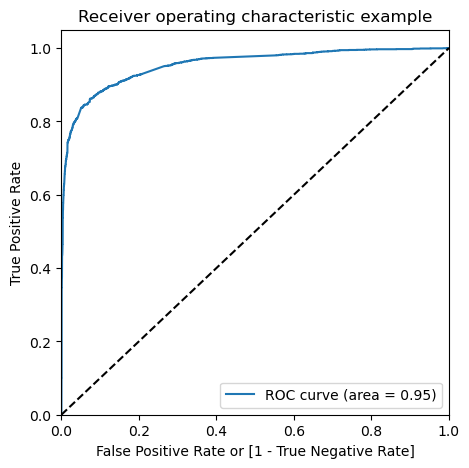

In [123]:
draw_roc(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

## Finding Optimal Cutoff Point

In [124]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
Lead Number,,,,,,,,,,,,
609431,0,0.039843,1,0,0,0,0,0,0,0,0,0
631817,0,0.059466,1,0,0,0,0,0,0,0,0,0
596164,0,0.021726,1,0,0,0,0,0,0,0,0,0
646570,0,0.038743,1,0,0,0,0,0,0,0,0,0
643974,0,0.036910,1,0,0,0,0,0,0,0,0,0


In [125]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob', 'accuracy', 'sensi', 'speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
display(cutoff_df)

,prob,accuracy,sensi,speci
0.0,0.0,0.381262,1.000000,0.000000
0.1,0.1,0.793754,0.960665,0.690905
0.2,0.2,0.871521,0.907543,0.849325
0.3,0.3,0.894249,0.878345,0.904048
0.4,0.4,0.899041,0.853204,0.927286
0.5,0.5,0.906463,0.836983,0.949275
0.6,0.6,0.901670,0.791565,0.969515
0.7,0.7,0.897186,0.768045,0.976762
0.8,0.8,0.890538,0.738443,0.984258
0.9,0.9,0.870594,0.676805,0.990005


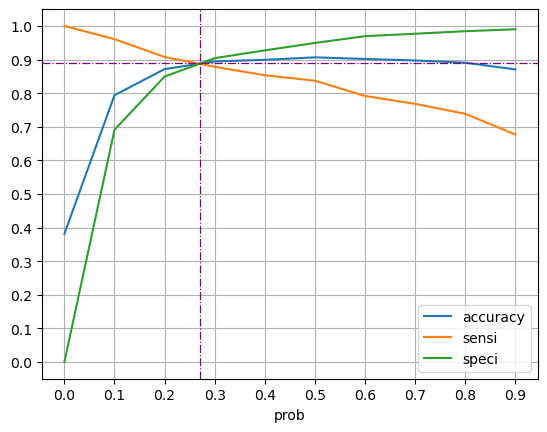

In [126]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])

plt.xticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
           labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
           labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

plt.grid()

cutx = 0.27
cuty = 0.89
plt.axline((cutx, 0.0), (cutx, 1.0), linestyle='-.', linewidth=0.9, color='purple')
plt.axline((0.0, cuty), (0.9, cuty), linestyle='-.', linewidth=0.9, color='purple')

plt.show()

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: From above curve diagram, Optimal Cutoff Point is very close to 0.27 as a cutoff probability.</b>
</div>

In [127]:
y_train_pred_final['Converted_Predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.27 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Converted_Predicted
Lead Number,,,,,,,,,,,,,
609431,0,0.039843,1,0,0,0,0,0,0,0,0,0,0
631817,0,0.059466,1,0,0,0,0,0,0,0,0,0,0
596164,0,0.021726,1,0,0,0,0,0,0,0,0,0,0
646570,0,0.038743,1,0,0,0,0,0,0,0,0,0,0
643974,0,0.036910,1,0,0,0,0,0,0,0,0,0,0


# Model Evaluation

#### Confusion Matrix

In [128]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Converted_Predicted"])
print(confusion)

[[3571  431]
 [ 285 2181]]


In [129]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Accuracy

In [130]:
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Predicted'])
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.8893


#### Sensitivity and Specificity

In [131]:
print("Sensitivity:", round(TP/(TP + FN), 4))
print("Specificity:", round(TN/(TN + FP), 4))

Sensitivity: 0.8844
Specificity: 0.8923


#### TPR/TNR and FPR/FNR

In [132]:
print("True Positive Rate (TPR): ", round(TP/(TP + FN), 4))
print("True Negative Rate (TNR): ", round(TN/(TN + FP), 4))

print("False Positive Rate (FPR): ", round(FP/(FP + TN), 4))
print("False Negative Rate (FNR): ", round(FN/(FN + TP), 4))

True Positive Rate (TPR):  0.8844
True Negative Rate (TNR):  0.8923
False Positive Rate (FPR):  0.1077
False Negative Rate (FNR):  0.1156


#### Precision and Recall

In [133]:
print("Precision: ", round(TP/(TP + FP), 4))
print("Recall: ", round(TP/(TP + FN), 4))

Precision:  0.835
Recall:  0.8844


### Visualizing Precision and Recall

In [134]:
p, r, thresholds = metrics.precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

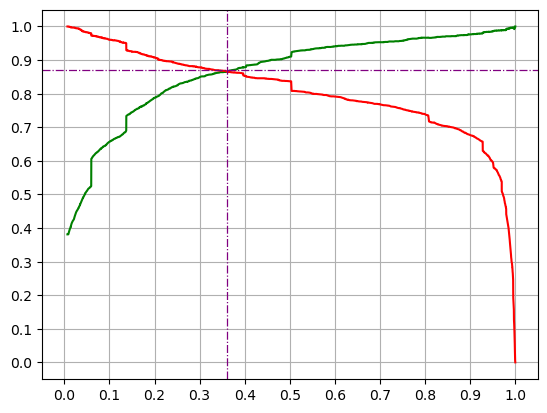

In [135]:
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

plt.xticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
           labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
           labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

plt.grid()

cutx = 0.36
cuty = 0.87
plt.axline((cutx, 0.0), (cutx, 1.0), linestyle='-.', linewidth=0.9, color='purple')
plt.axline((0.0, cuty), (0.9, cuty), linestyle='-.', linewidth=0.9, color='purple')

plt.show()

<div style="background-color: #F9E79F;font-size:12pt">
<b>NOTE: As per business requirement, balance of precision and recall is important. So, using interaction point as cutoff (0.36).</b>
</div>

In [136]:
y_train_pred_final['Converted_Predicted_PR'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Converted_Predicted,Converted_Predicted_PR
Lead Number,,,,,,,,,,,,,,
609431,0,0.039843,1,0,0,0,0,0,0,0,0,0,0,0
631817,0,0.059466,1,0,0,0,0,0,0,0,0,0,0,0
596164,0,0.021726,1,0,0,0,0,0,0,0,0,0,0,0
646570,0,0.038743,1,0,0,0,0,0,0,0,0,0,0,0
643974,0,0.036910,1,0,0,0,0,0,0,0,0,0,0,0


## Revalidating Matrices

#### Confusion Matrix

In [137]:
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Converted_Predicted_PR"])
print(confusion)

[[3669  333]
 [ 332 2134]]


In [138]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Accuracy

In [139]:
accuracy = metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_Predicted_PR'])
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.8972


#### Sensitivity and Specificity

In [140]:
print("Sensitivity:", round(TP/(TP + FN), 4))
print("Specificity:", round(TN/(TN + FP), 4))

Sensitivity: 0.8654
Specificity: 0.9168


#### TPR/TNR and FPR/FNR

In [141]:
print("True Positive Rate (TPR): ", round(TP/(TP + FN), 4))
print("True Negative Rate (TNR): ", round(TN/(TN + FP), 4))

print("False Positive Rate (FPR): ", round(FP/(FP + TN), 4))
print("False Negative Rate (FNR): ", round(FN/(FN + TP), 4))

True Positive Rate (TPR):  0.8654
True Negative Rate (TNR):  0.9168
False Positive Rate (FPR):  0.0832
False Negative Rate (FNR):  0.1346


#### Precision and Recall

In [142]:
print("Precision: ", round(TP/(TP + FP), 4))
print("Recall: ", round(TP/(TP + FN), 4))

Precision:  0.865
Recall:  0.8654


# Making predictions on the test dataset

#### Scaling of Test dataset

In [143]:
df_test.head()

,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Specialization_Business,Specialization_Management,Specialization_Others,Occupation_Student,Occupation_Working Professional,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES
Lead Number,,,,,,,,,,,,,,,,,,,,
639211,0,1,0,0.00,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
590711,0,1,1503,2.00,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1
644174,0,1,1024,1.50,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
641392,0,0,186,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
587955,0,1,1725,3.25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [144]:
col_support

Index(['Total Time Spent on Website', 'Lead_Origin_Landing Page Submission',
       'Lead_Origin_Lead Import', 'Lead_Source_Direct Traffic',
       'Lead_Source_Google', 'Lead_Source_Olark Chat',
       'Lead_Source_Organic Search', 'Lead_Source_Reference',
       'Last_Notable_Activity_Email Opened', 'Last_Notable_Activity_SMS Sent',
       'Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES'],
      dtype='object')

In [145]:
col_numr_support = [c for c in col_numr if c in col_support]
col_numr_support

['Total Time Spent on Website']

In [146]:
df_test.head()

,Do Not Email,Converted,Total Time Spent on Website,Page Views Per Visit,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Specialization_Business,Specialization_Management,Specialization_Others,Occupation_Student,Occupation_Working Professional,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES
Lead Number,,,,,,,,,,,,,,,,,,,,
639211,0,1,0,0.00,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
590711,0,1,1503,2.00,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1
644174,0,1,1024,1.50,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
641392,0,0,186,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
587955,0,1,1725,3.25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [147]:
df_test[col_numr] = scaler.transform(df_test[col_numr])

In [148]:
lst = list(col_support)
lst.append('Converted')

df_test = df_test[lst]

#### Creating X and y for test data

In [149]:
y_test = df_test[['Converted']]
X_test = df_test.drop('Converted', axis=1)

In [150]:
X_test.head()

,Total Time Spent on Website,Lead_Origin_Landing Page Submission,Lead_Origin_Lead Import,Lead_Source_Direct Traffic,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Reference,Last_Notable_Activity_Email Opened,Last_Notable_Activity_SMS Sent,Tags_Conversion_Chances_HIGH_CONVERSION_CHANCES
Lead Number,,,,,,,,,,,
639211,-0.886868,0,0,0,0,0,0,1,0,0,1
590711,1.875759,1,0,1,0,0,0,0,0,1,1
644174,0.995321,1,0,1,0,0,0,0,1,0,1
641392,-0.544986,1,0,0,1,0,0,0,0,0,0
587955,2.283811,0,0,0,1,0,0,0,1,0,0


In [151]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [152]:
# Getting the predicted values on the test set
y_test_pred = logm2.predict(X_test_sm)           # giving prob. of getting 1 (Converted from Lead)

y_test_pred[:10]

Lead Number
639211    0.927630
590711    0.998358
644174    0.976134
641392    0.019109
587955    0.632962
593130    0.009543
648319    0.059466
636722    0.999297
648231    0.998809
637858    0.025211
dtype: float64

In [153]:
# Convert to array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.92762997, 0.99835816, 0.97613445, 0.01910905, 0.63296203,
       0.00954343, 0.05946563, 0.99929705, 0.99880903, 0.02521063])

In [154]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.Converted, 'Converted_Prob':y_test_pred})
y_test_pred_final.set_index(y_test.index, inplace = True)
y_test_pred_final.head()

,Converted,Converted_Prob
Lead Number,,
639211,1,0.927630
590711,1,0.998358
644174,1,0.976134
641392,0,0.019109
587955,1,0.632962


In [155]:
y_test_pred_final['Converted_Predicted_PR'] = y_test_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.39 else 0)

### Plotting the ROC Curve on test dataset

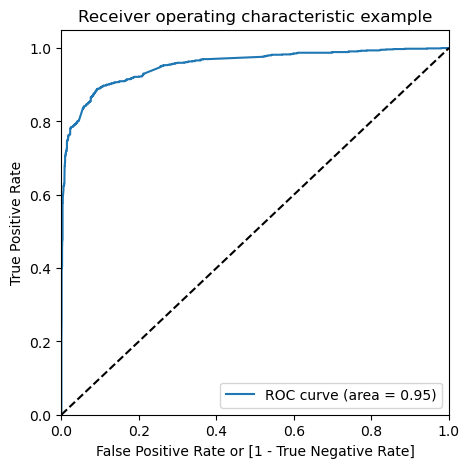

In [156]:
draw_roc(y_test_pred_final['Converted'], y_test_pred_final['Converted_Prob'])

# Model Evaluation on Test dataset

#### Confusion Matrix

In [157]:
confusion = metrics.confusion_matrix(y_test_pred_final["Converted"], y_test_pred_final["Converted_Predicted_PR"])
print(confusion)

[[1547  130]
 [ 146  949]]


In [158]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Accuracy

In [159]:
accuracy = metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Converted_Predicted_PR'])
print("Accuracy:", round(accuracy, 4))

Accuracy: 0.9004


#### Sensitivity and Specificity

In [160]:
print("Sensitivity:", round(TP/(TP + FN), 4))
print("Specificity:", round(TN/(TN + FP), 4))

Sensitivity: 0.8667
Specificity: 0.9225


#### TPR/TNR and FPR/FNR

In [161]:
print("True Positive Rate (TPR): ", round(TP/(TP + FN), 4))
print("True Negative Rate (TNR): ", round(TN/(TN + FP), 4))

print("False Positive Rate (FPR): ", round(FP/(FP + TN), 4))
print("False Negative Rate (FNR): ", round(FN/(FN + TP), 4))

True Positive Rate (TPR):  0.8667
True Negative Rate (TNR):  0.9225
False Positive Rate (FPR):  0.0775
False Negative Rate (FNR):  0.1333


#### Precision and Recall

In [162]:
print("Precision: ", round(TP/(TP + FP), 4))
print("Recall: ", round(TP/(TP + FN), 4))

Precision:  0.8795
Recall:  0.8667


# Lead Score for each record

A lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

#### Lead Score by its definition is the chances to be converted from lead, which is nothing but probility of lead to be converted in percentage.

For Train dataset

In [163]:
y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_train_pred_final[['Converted', 'Converted_Prob', 'Converted_Predicted_PR', 'Lead_Score']].head()

,Converted,Converted_Prob,Converted_Predicted_PR,Lead_Score
Lead Number,,,,
609431,0,0.039843,0,4
631817,0,0.059466,0,6
596164,0,0.021726,0,2
646570,0,0.038743,0,4
643974,0,0.036910,0,4


For Test dataset

In [164]:
y_test_pred_final['Lead_Score'] = y_test_pred_final['Converted_Prob'].map(lambda x: round(x*100))
y_test_pred_final.head()

,Converted,Converted_Prob,Converted_Predicted_PR,Lead_Score
Lead Number,,,,
639211,1,0.927630,1,93
590711,1,0.998358,1,100
644174,1,0.976134,1,98
641392,0,0.019109,0,2
587955,1,0.632962,1,63


# The equation of our best fitted line is:

# ********************* End of Study *********************